In [1]:
import pandas as pd
import csv
import os
import numpy as np
import datetime
from xlsxwriter.workbook import Workbook
from xlsxwriter import Workbook
import time
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
Working_dir = os.getcwd()
Data_dir = os.path.join(Working_dir, "Raw data")
Output_dir = os.path.join(Working_dir, 'Analysis')

In [3]:
node_df = pd.read_csv( os.path.join( Data_dir,"May2018_idle.csv"), delimiter=";", header=0 )

In [4]:
node_df.head()

nodename                          tempo  timestamp_measure  sys_power  \
0  cresco6x001  Tue 15 May 16:05:48 CEST 2018         1526393148        150   
1  cresco6x002  Tue 15 May 16:05:58 CEST 2018         1526393148        150   
2  cresco6x003  Tue 15 May 16:06:07 CEST 2018         1526393148        150   
3  cresco6x004  Tue 15 May 16:06:16 CEST 2018         1526393148        150   
4  cresco6x005  Tue 15 May 16:06:26 CEST 2018         1526393148        150   

   cpu_power  mem_power  fan1a  fan1b  fan2a  fan2b    ...      sys_util  \
0        110         13   3584   3712   4736   4992    ...             0   
1        110         12   3584   3712   4736   4992    ...             0   
2        110         12   3584   3712   4736   4992    ...             0   
3        110         10   3584   3712   4736   4992    ...             0   
4        110         13   3712   3712   4736   4992    ...             0   

   cpu_util  mem_util  io_util  amb_temp  cpu1_temp  cpu2_temp  exh_temp  \
0         0         0        0        19         45         40        38   
1         0         0        0        18         45         40        38   
2         0         0        0        20         47         39        40   
3         0         0        0        17         44         37        37   
4         0         0        0        19         43         37        38   

   sysairflow   dcenergy  
0          13  260,19502  
1          13  251,28987  
2          13  253,87433  
3          13  232,74909  
4          13  243,38527  

[5 rows x 26 columns]

In [5]:
node_df.nodename.unique()

array(['cresco6x001', 'cresco6x002', 'cresco6x003', 'cresco6x004',
       'cresco6x005', 'cresco6x006', 'cresco6x007', 'cresco6x008',
       'cresco6x009', 'cresco6x010', 'cresco6x011', 'cresco6x012',
       'cresco6x013', 'cresco6x014', 'cresco6x015', 'cresco6x016',
       'cresco6x017', 'cresco6x018', 'cresco6x019', 'cresco6x020',
       'cresco6x021', 'cresco6x022', 'cresco6x023', 'cresco6x024',
       'cresco6x025', 'cresco6x026', 'cresco6x027', 'cresco6x028',
       'cresco6x029', 'cresco6x030', 'cresco6x031', 'cresco6x032',
       'cresco6x033', 'cresco6x034', 'cresco6x035', 'cresco6x036',
       'cresco6x037', 'cresco6x038', 'cresco6x039', 'cresco6x040',
       'cresco6x041', 'cresco6x042', 'cresco6x043', 'cresco6x044',
       'cresco6x045', 'cresco6x046', 'cresco6x047', 'cresco6x048',
       'cresco6x049', 'cresco6x050', 'cresco6x051', 'cresco6x052',
       'cresco6x053', 'cresco6x054', 'cresco6x055', 'cresco6x056',
       'cresco6x057', 'cresco6x058', 'cresco6x059', 'cresco6x0

In [6]:
len(node_df.nodename.unique())

215

In [1]:
node_names = ['cresco6x001', 'cresco6x002', 'cresco6x003', 'cresco6x004',
       'cresco6x005', 'cresco6x006', 'cresco6x007', 'cresco6x008',
       'cresco6x009', 'cresco6x010', 'cresco6x011', 'cresco6x012',
       'cresco6x013', 'cresco6x014', 'cresco6x015', 'cresco6x016',
       'cresco6x017', 'cresco6x018', 'cresco6x019', 'cresco6x020',
       'cresco6x021', 'cresco6x022', 'cresco6x023', 'cresco6x024',
       'cresco6x025', 'cresco6x026', 'cresco6x027', 'cresco6x028',
       'cresco6x029', 'cresco6x030', 'cresco6x031', 'cresco6x032',
       'cresco6x033', 'cresco6x034', 'cresco6x035', 'cresco6x036',
       'cresco6x037', 'cresco6x038', 'cresco6x039', 'cresco6x040',
       'cresco6x041', 'cresco6x042', 'cresco6x043', 'cresco6x044',
       'cresco6x045', 'cresco6x046', 'cresco6x047', 'cresco6x048',
       'cresco6x049', 'cresco6x050', 'cresco6x051', 'cresco6x052',
       'cresco6x053', 'cresco6x054', 'cresco6x055', 'cresco6x056',
       'cresco6x057', 'cresco6x058', 'cresco6x059', 'cresco6x060',
       'cresco6x061', 'cresco6x062', 'cresco6x063', 'cresco6x064',
       'cresco6x065', 'cresco6x066', 'cresco6x067', 'cresco6x068',
       'cresco6x069', 'cresco6x070', 'cresco6x071', 'cresco6x072',
       'cresco6x073', 'cresco6x074', 'cresco6x075', 'cresco6x076',
       'cresco6x077', 'cresco6x078', 'cresco6x079', 'cresco6x080',
       'cresco6x081', 'cresco6x082', 'cresco6x083', 'cresco6x084',
       'cresco6x085', 'cresco6x086', 'cresco6x087', 'cresco6x088',
       'cresco6x089', 'cresco6x090', 'cresco6x091', 'cresco6x092',
       'cresco6x093', 'cresco6x094', 'cresco6x095', 'cresco6x096',
       'cresco6x097', 'cresco6x098', 'cresco6x099', 'cresco6x100',
       'cresco6x101', 'cresco6x102', 'cresco6x103', 'cresco6x104',
       'cresco6x105', 'cresco6x106', 'cresco6x107', 'cresco6x108',
       'cresco6x109', 'cresco6x110', 'cresco6x111', 'cresco6x112',
       'cresco6x113', 'cresco6x115', 'cresco6x116', 'cresco6x117',
       'cresco6x118', 'cresco6x119', 'cresco6x120', 'cresco6x121',
       'cresco6x122', 'cresco6x123', 'cresco6x124', 'cresco6x125',
       'cresco6x126', 'cresco6x127', 'cresco6x128', 'cresco6x129',
       'cresco6x130', 'cresco6x131', 'cresco6x132', 'cresco6x133',
       'cresco6x134', 'cresco6x135', 'cresco6x136', 'cresco6x137',
       'cresco6x138', 'cresco6x139', 'cresco6x140', 'cresco6x141',
       'cresco6x142', 'cresco6x143', 'cresco6x144', 'cresco6x145',
       'cresco6x146', 'cresco6x147', 'cresco6x148', 'cresco6x149',
       'cresco6x150', 'cresco6x151', 'cresco6x152', 'cresco6x153',
       'cresco6x154', 'cresco6x155', 'cresco6x156', 'cresco6x157',
       'cresco6x158', 'cresco6x159', 'cresco6x160', 'cresco6x161',
       'cresco6x162', 'cresco6x163', 'cresco6x164', 'cresco6x165',
       'cresco6x166', 'cresco6x167', 'cresco6x168', 'cresco6x169',
       'cresco6x170', 'cresco6x171', 'cresco6x172', 'cresco6x173',
       'cresco6x174', 'cresco6x175', 'cresco6x176', 'cresco6x177',
       'cresco6x178', 'cresco6x179', 'cresco6x180', 'cresco6x181',
       'cresco6x182', 'cresco6x183', 'cresco6x184', 'cresco6x185',
       'cresco6x186', 'cresco6x187', 'cresco6x188', 'cresco6x189',
       'cresco6x190', 'cresco6x191', 'cresco6x192', 'cresco6x193',
       'cresco6x194', 'cresco6x195', 'cresco6x196', 'cresco6x197',
       'cresco6x198', 'cresco6x199', 'cresco6x200', 'cresco6x201',
       'cresco6x202', 'cresco6x203', 'cresco6x204', 'cresco6x205',
       'cresco6x206', 'cresco6x207', 'cresco6x208', 'cresco6x209',
       'cresco6x210', 'cresco6x211', 'cresco6x212', 'cresco6x213',
       'cresco6x214', 'cresco6x215', 'cresco6x216']

## No node with name 'cresco6x114'

In [7]:
print(node_df[node_df.nodename == 'cresco6x114'])

Empty DataFrame
Columns: [nodename, tempo, timestamp_measure, sys_power, cpu_power, mem_power, fan1a, fan1b, fan2a, fan2b, fan3a, fan3b, fan4a, fan4b, fan5a, fan5b, sys_util, cpu_util, mem_util, io_util, amb_temp, cpu1_temp, cpu2_temp, exh_temp, sysairflow, dcenergy]
Index: []

[0 rows x 26 columns]


## Reformat dcenergy column to have float view & add timestamp

In [11]:
node_df.dcenergy = node_df.dcenergy.apply(lambda x: float(x.replace(",", ".")) )

In [12]:
node_df["timestamp_py"] = node_df["timestamp_measure"].apply(lambda x: datetime.datetime.utcfromtimestamp(x))

## Save reformatted data

In [10]:
excel_writer_may_idle = pd.ExcelWriter( os.path.join( Data_dir, "May2018_idle_formatted.xlsx"))
node_df.to_excel(excel_writer_may_idle)
excel_writer_may_idle.save()

KeyboardInterrupt: 

-----
# Energy used by node
- for system, CPU and memory, rectangle formula of integration is applied
- dcenergy is simply summed

In [86]:
nodes_stats = pd.DataFrame(columns = list(node_df.nodename.unique()))

In [87]:
nodes_stats.loc["total_dcenergy", :] = 0

## Calculating integral value for power using rectangle back count formula

In [88]:
for col in nodes_stats.columns.values:
    
    one_node_df = node_df[node_df.nodename == col].copy()
    row_num = one_node_df.shape[0]
    
    sys_energy = one_node_df["sys_power"][:-1].values/1000.0
    cpu_energy = one_node_df["cpu_power"][:-1].values/1000.0
    mem_energy = one_node_df["mem_power"][:-1].values/1000.0

    time_difference = (one_node_df["timestamp_measure"][1:].values -\
    one_node_df["timestamp_measure"][:-1].values)/3600.0
    
    nodes_stats.loc["sys_energy", col] = np.dot(sys_energy, time_difference)
    nodes_stats.loc["cpu_energy", col] = np.dot(cpu_energy, time_difference)
    nodes_stats.loc["mem_energy", col] = np.dot(mem_energy, time_difference)
    
    nodes_stats.loc["sys_energy_other", col] = nodes_stats.loc["sys_energy", col] - \
                                                    nodes_stats.loc["cpu_energy", col] - \
                                                    nodes_stats.loc["mem_energy", col]
            
       
    nodes_stats.loc["total_dcenergy", col] = node_df[node_df.nodename == col]["dcenergy"].max() -\
        node_df[node_df.nodename == col]["dcenergy"].min()
    
    nodes_stats.loc["total_dcenergy - sys_energy", col] = nodes_stats.loc["total_dcenergy", col] - \
                                                        nodes_stats.loc["sys_energy", col]

In [89]:
nodes_stats

cresco6x001  cresco6x002  cresco6x003  \
total_dcenergy                 65.474480    75.141040    73.640830   
sys_energy                     61.088128    69.750008    67.914197   
cpu_energy                     45.191056    52.105000    51.956256   
mem_energy                      5.174917     4.774370     4.764949   
sys_energy_other               10.722155    12.870639    11.192993   
total_dcenergy - sys_energy     4.386352     5.391032     5.726633   

                             cresco6x004  cresco6x005  cresco6x006  \
total_dcenergy                 74.992180   302.257620    75.187430   
sys_energy                     69.645422    67.696389    69.904397   
cpu_energy                     52.023850    51.796639    54.036467   
mem_energy                      4.007822     5.339703     5.150401   
sys_energy_other               13.613750    10.560047    10.717530   
total_dcenergy - sys_energy     5.346758   234.561231     5.283033   

                             cresco6x007  cresco6x008  cresco6x009  \
total_dcenergy                 72.368760    74.068250    76.066660   
sys_energy                     65.884961    67.683717    69.970322   
cpu_energy                     51.654797    51.829400    54.035319   
mem_energy                      5.535940     4.752918     3.967728   
sys_energy_other                8.694224    11.101398    11.967275   
total_dcenergy - sys_energy     6.483799     6.384533     6.096338   

                             cresco6x010     ...       cresco6x207  \
total_dcenergy                 75.417510     ...         71.938250   
sys_energy                     70.002561     ...         66.965808   
cpu_energy                     54.148503     ...         51.139519   
mem_energy                      5.398535     ...          5.489955   
sys_energy_other               10.455524     ...         10.336334   
total_dcenergy - sys_energy     5.414949     ...          4.972442   

                             cresco6x208  cresco6x209  cresco6x210  \
total_dcenergy                 73.779760    73.082720    71.171430   
sys_energy                     68.900589    66.998642    66.948186   
cpu_energy                     51.145156    51.291728    51.189442   
mem_energy                      5.098126     4.706411     5.880651   
sys_energy_other               12.657308    11.000503     9.878093   
total_dcenergy - sys_energy     4.879171     6.084078     4.223244   

                             cresco6x211  cresco6x212  cresco6x213  \
total_dcenergy                 69.581810    72.137020    74.335280   
sys_energy                     65.220144    66.990903    70.895481   
cpu_energy                     51.143692    51.277922    52.492281   
mem_energy                      5.789489     4.707522     5.820573   
sys_energy_other                8.286964    11.005458    12.582628   
total_dcenergy - sys_energy     4.361666     5.146117     3.439799   

                             cresco6x214  cresco6x215  cresco6x216  
total_dcenergy                 71.541430    69.202020    56.633540  
sys_energy                     66.987944    65.187303    58.134936  
cpu_energy                     51.150978    51.145253    42.446433  
mem_energy                      5.099401     5.099225     5.485126  
sys_energy_other               10.737566     8.942825    10.203377  
total_dcenergy - sys_energy     4.553486     4.014717    -1.501396  

[6 rows x 215 columns]

In [91]:
np.where(nodes_stats.loc["total_dcenergy - sys_energy", :] <= 0)

(array([ 46,  95, 101, 105, 162, 175, 214], dtype=int64),)

In [92]:
nodes_stats.loc[:, ['cresco6x047',  'cresco6x096', 'cresco6x102', 'cresco6x106', \
                                      'cresco6x164', 'cresco6x177', 'cresco6x216'] ]

cresco6x047  cresco6x096  cresco6x102  \
total_dcenergy                 11.414340     0.000000    44.044040   
sys_energy                     63.969250     3.917519    68.662050   
cpu_energy                     49.935697     0.000000    54.589256   
mem_energy                      5.484527     0.000000     5.105890   
sys_energy_other                8.549026     3.917519     8.966904   
total_dcenergy - sys_energy   -52.554910    -3.917519   -24.618010   

                             cresco6x106  cresco6x164  cresco6x177  \
total_dcenergy                       0.0     0.000000    48.089450   
sys_energy                           0.0    58.762792    66.939883   
cpu_energy                           0.0    47.010233    51.108633   
mem_energy                           0.0     4.701023     4.292883   
sys_energy_other                     0.0     7.051535    11.538367   
total_dcenergy - sys_energy          0.0   -58.762792   -18.850433   

                             cresco6x216  
total_dcenergy                 56.633540  
sys_energy                     58.134936  
cpu_energy                     42.446433  
mem_energy                      5.485126  
sys_energy_other               10.203377  
total_dcenergy - sys_energy    -1.501396

In [93]:
excel_writer_may = pd.ExcelWriter( os.path.join( Data_dir, "May2018_nodes_stats.xlsx"))
nodes_stats.to_excel(excel_writer_may)
excel_writer_may.save()

## Calculating integral value for power using rectangle forth count formula

In [98]:
nodes_stats = pd.DataFrame(columns = list(node_df.nodename.unique()))

In [99]:
nodes_stats.loc["total_dcenergy", :] = 0

for col in nodes_stats.columns.values:
    
    one_node_df = node_df[node_df.nodename == col].copy()
    row_num = one_node_df.shape[0]
    
    sys_energy = one_node_df["sys_power"][1:].values/1000.0
    cpu_energy = one_node_df["cpu_power"][1:].values/1000.0
    mem_energy = one_node_df["mem_power"][1:].values/1000.0

    time_difference = (one_node_df["timestamp_measure"][1:].values -\
    one_node_df["timestamp_measure"][:-1].values)/3600.0
    
    nodes_stats.loc["sys_energy", col] = np.dot(sys_energy, time_difference)
    nodes_stats.loc["cpu_energy", col] = np.dot(cpu_energy, time_difference)
    nodes_stats.loc["mem_energy", col] = np.dot(mem_energy, time_difference)
    
    nodes_stats.loc["total_dcenergy", col] = node_df[node_df.nodename == col]["dcenergy"].max() -\
        node_df[node_df.nodename == col]["dcenergy"].min()
    
nodes_stats.loc["sys_energy_other", :] = nodes_stats.loc["sys_energy", :] - \
    nodes_stats.loc["cpu_energy", :] - nodes_stats.loc["mem_energy", :]
nodes_stats.loc["total_dcenergy - sys_energy", :] = nodes_stats.loc["total_dcenergy", :] - \
    nodes_stats.loc["sys_energy", :]

In [12]:
for node in nodes_stats.columns.values:
    if nodes_stats.loc["total_dcenergy", node] > 0.:
        nodes_stats.loc["total_energy_error_percent", node] = abs(nodes_stats.loc["total_dcenergy - sys_energy", node]) / \
            nodes_stats.loc["total_dcenergy", node] * 100.
    else: 
        nodes_stats.loc["total_energy_error_percent", node] = abs(nodes_stats.loc["total_dcenergy - sys_energy", node]) / \
            nodes_stats.loc["sys_energy", node] * 100.

c:\users\aagri\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [13]:
excel_writer_may = pd.ExcelWriter( os.path.join( Data_dir, "May2018_nodes_stats_forth_integral.xlsx"))
nodes_stats.to_excel(excel_writer_may)
excel_writer_may.save()

In [101]:
nodes_stats

cresco6x001  cresco6x002  cresco6x003  \
total_dcenergy                 65.474480    75.141040    73.640830   
sys_energy                     67.553397    76.961222    75.301086   
cpu_energy                     51.487794    59.320856    58.989817   
mem_energy                      5.242640     4.843908     4.836218   
sys_energy_other               10.822963    12.796458    11.475051   
total_dcenergy - sys_energy    -2.078917    -1.820182    -1.660256   

                             cresco6x004  cresco6x005  cresco6x006  \
total_dcenergy                 74.992180   302.257620    75.187430   
sys_energy                     78.053600    74.551464    78.496772   
cpu_energy                     58.856344    58.465556    62.267447   
mem_energy                      4.075903     5.252182     5.221342   
sys_energy_other               15.121352    10.833726    11.007983   
total_dcenergy - sys_energy    -3.061420   227.706156    -3.309342   

                             cresco6x007  cresco6x008  cresco6x009  \
total_dcenergy                 72.368760    74.068250    76.066660   
sys_energy                     74.282211    74.706258    78.552439   
cpu_energy                     58.322772    58.673994    62.261997   
mem_energy                      5.605061     4.823634     4.056357   
sys_energy_other               10.354378    11.208629    12.234085   
total_dcenergy - sys_energy    -1.913451    -0.638008    -2.485779   

                             cresco6x010     ...       cresco6x207  \
total_dcenergy                 75.417510     ...         71.938250   
sys_energy                     78.575064     ...         71.683933   
cpu_energy                     62.541644     ...         55.852575   
mem_energy                      5.331112     ...          5.490923   
sys_energy_other               10.702307     ...         10.340435   
total_dcenergy - sys_energy    -3.157554     ...          0.254317   

                             cresco6x208  cresco6x209  cresco6x210  \
total_dcenergy                 73.779760    73.082720    71.171430   
sys_energy                     75.162183    71.710325    71.655969   
cpu_energy                     55.850747    56.002711    55.893217   
mem_energy                      5.098212     4.706672     5.880446   
sys_energy_other               14.213224    11.000942     9.882307   
total_dcenergy - sys_energy    -1.382423     1.372395    -0.484539   

                             cresco6x211  cresco6x212  cresco6x213  \
total_dcenergy                 69.581810    72.137020    74.335280   
sys_energy                     71.492947    71.698339    75.601667   
cpu_energy                     55.852375    55.982858    57.015389   
mem_energy                      5.618059     4.707316     5.817641   
sys_energy_other               10.022514    11.008164    12.768637   
total_dcenergy - sys_energy    -1.911137     0.438681    -1.266387   

                             cresco6x214  cresco6x215  cresco6x216  
total_dcenergy                 71.541430    69.202020    56.633540  
sys_energy                     71.697517    71.456683    58.513583  
cpu_energy                     55.854567    55.854292    43.008919  
mem_energy                      5.098903     5.099067     5.485041  
sys_energy_other               10.744047    10.503324    10.019623  
total_dcenergy - sys_energy    -0.156087    -2.254663    -1.880043  

[6 rows x 215 columns]

## Resume
- forth integral is more precise
- agreed: for columns *_util data is not available 
- 215 (!), not 216 different nodes

### Further analysis
- check dcenergy, etc columns for ['cresco6x047',  'cresco6x096', 'cresco6x102', 'cresco6x106','cresco6x164', 'cresco6x177', 'cresco6x216']
- energy correlation
- fans - energy correlation

In [6]:
nodes_stats = pd.read_excel( os.path.join( Output_dir,"May2018_nodes_stats_forth_integral.xlsx") )

### Select nodes with errors of system power integration > 5%

In [8]:
nodes_stats.iloc[:, np.where(nodes_stats.loc["total_energy_error_percent", :] > 5.)[0] ]

cresco6x005  cresco6x026  cresco6x031  \
total_dcenergy                302.257620   301.187610   302.475770   
sys_energy                     74.551464    69.568028    77.362586   
cpu_energy                     58.465556    57.073261    61.292275   
mem_energy                      5.252182     5.119917     3.948177   
sys_energy_other               10.833726     7.374850    12.122134   
total_dcenergy - sys_energy   227.706156   231.619582   225.113184   
total_energy_error_percent     75.335125    76.902095    74.423543   

                             cresco6x047  cresco6x055  cresco6x067  \
total_dcenergy                 11.414340   328.745750   107.506840   
sys_energy                     70.227050    77.033675    72.528764   
cpu_energy                     54.629047    61.321275    56.126122   
mem_energy                      5.484527     5.899735     5.122661   
sys_energy_other               10.113476     9.812665    11.279981   
total_dcenergy - sys_energy   -58.812710   251.712075    34.978076   
total_energy_error_percent    515.252831    76.567400    32.535675   

                             cresco6x078  cresco6x091  cresco6x096  \
total_dcenergy                285.770140   315.582790     0.000000   
sys_energy                     32.661650    71.734383     3.917519   
cpu_energy                     22.577222    55.901975     0.000000   
mem_energy                      2.867818     5.100451     0.000000   
sys_energy_other                7.216610    10.731958     3.917519   
total_dcenergy - sys_energy   253.108490   243.848407    -3.917519   
total_energy_error_percent     88.570657    77.269235   100.000000   

                             cresco6x102  cresco6x119  cresco6x124  \
total_dcenergy                 44.044040   302.814160   275.419340   
sys_energy                     74.930611    71.654911    75.637792   
cpu_energy                     59.293078    55.922264    59.876000   
mem_energy                      5.106004     5.103039     5.105320   
sys_energy_other               10.531530    10.629608    10.656472   
total_dcenergy - sys_energy   -30.886571   231.159249   199.781548   
total_energy_error_percent     70.126562    76.337001    72.537226   

                             cresco6x139  cresco6x163  cresco6x164  \
total_dcenergy                249.745740   338.642600     0.000000   
sys_energy                     75.651589    75.589442    58.762792   
cpu_energy                     59.934367    59.867319    47.010233   
mem_energy                      5.034213     5.472970     4.701023   
sys_energy_other               10.683009    10.249153     7.051535   
total_dcenergy - sys_energy   174.094151   263.053158   -58.762792   
total_energy_error_percent     69.708557    77.678697   100.000000   

                             cresco6x177  
total_dcenergy                 48.089450  
sys_energy                     71.660739  
cpu_energy                     55.828097  
mem_energy                      4.292884  
sys_energy_other               11.539757  
total_dcenergy - sys_energy   -23.571289  
total_energy_error_percent     49.015509

### Check all the nodes with false dcenergy measurements 

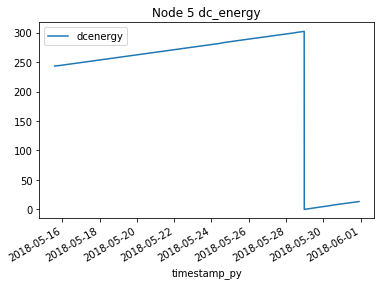

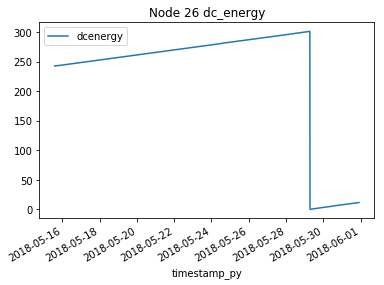

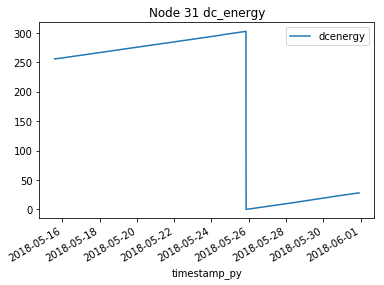

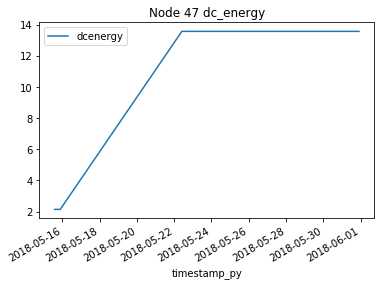

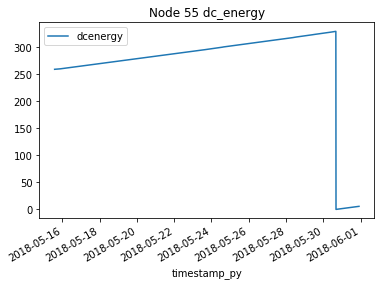

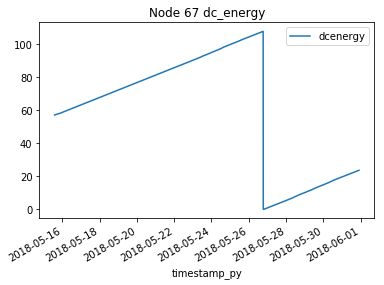

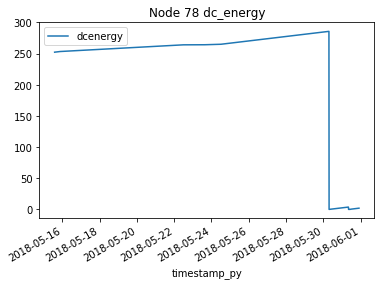

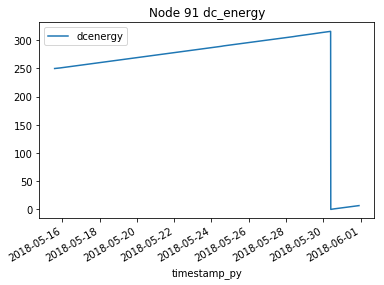

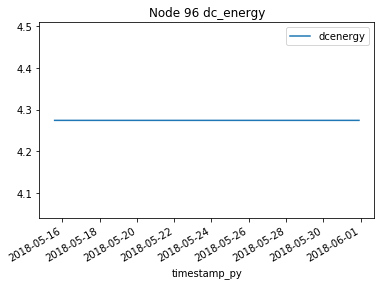

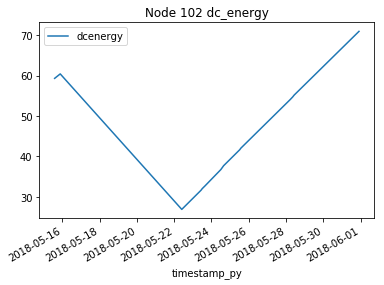

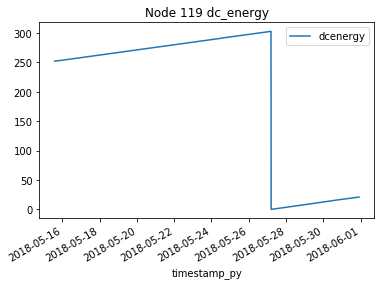

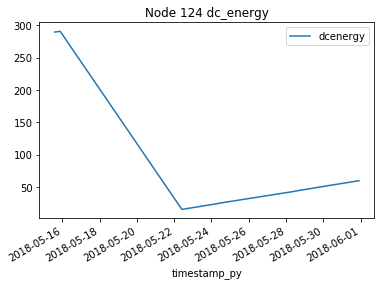

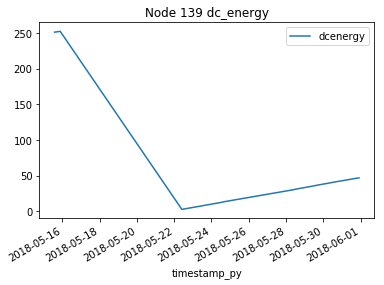

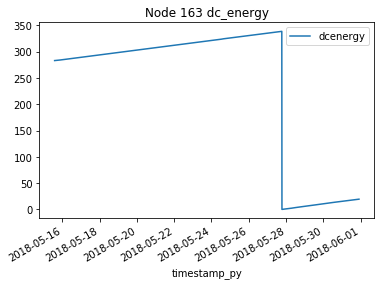

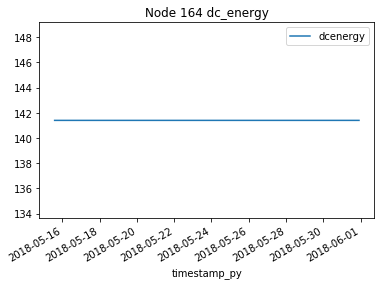

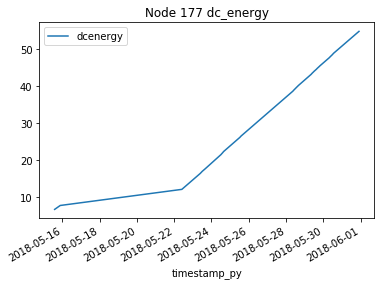

In [13]:
i=0
for node in nodes_stats.iloc[:, np.where(nodes_stats.loc["total_energy_error_percent", :] > 5.)[0] ].columns.values:
    int_name = int(node.split('x')[-1])
    node_df[node_df.nodename == node].plot(x='timestamp_py', y='dcenergy', title='Node '+str(int_name)+' dc_energy')
    i+=1

In [14]:
i

16

c:\users\aagri\appdata\local\programs\python\python35\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


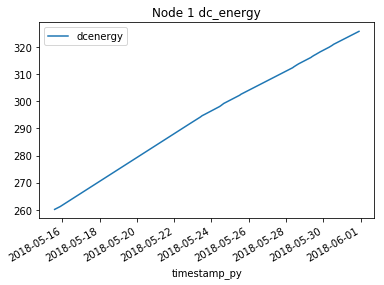

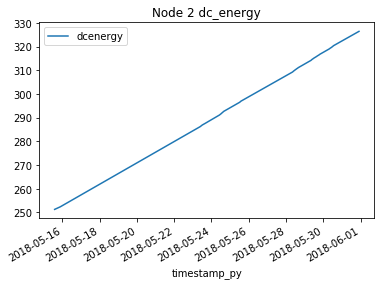

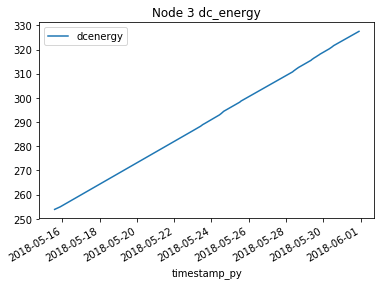

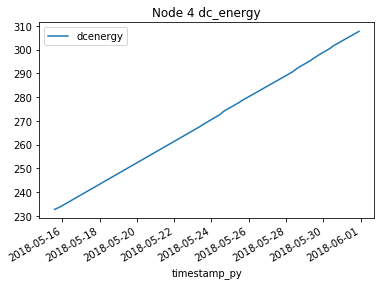

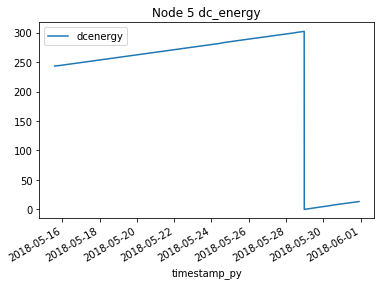

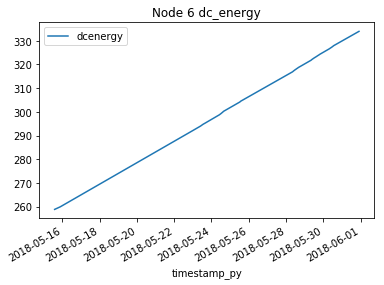

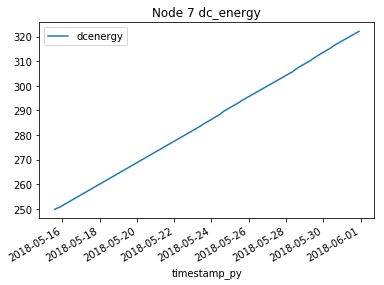

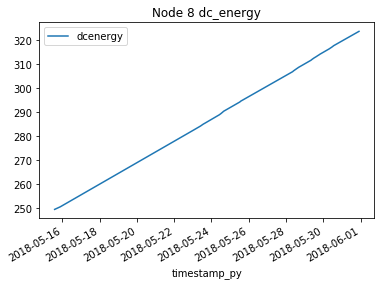

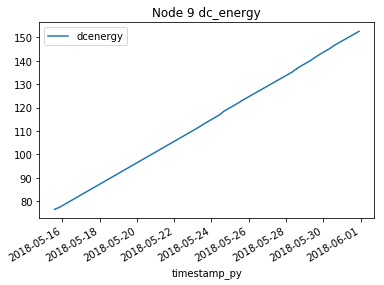

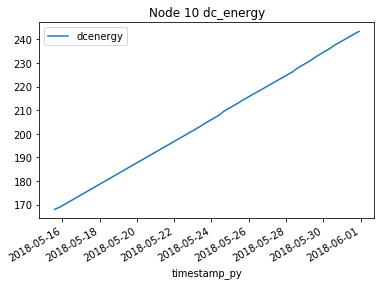

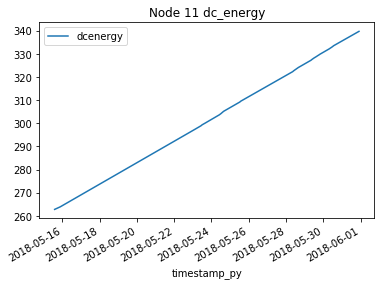

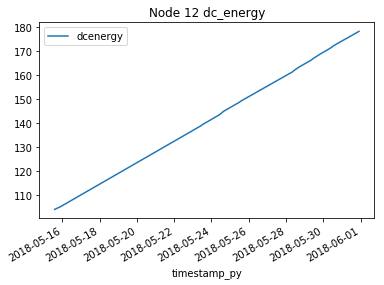

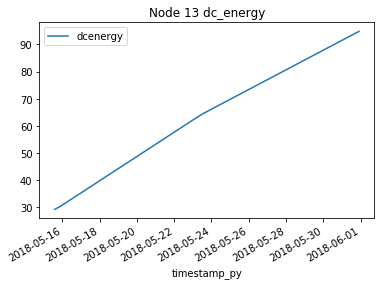

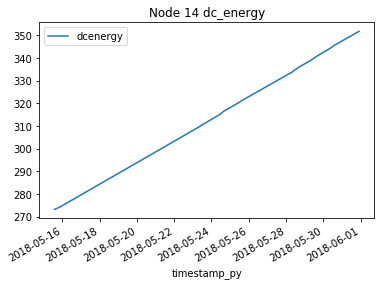

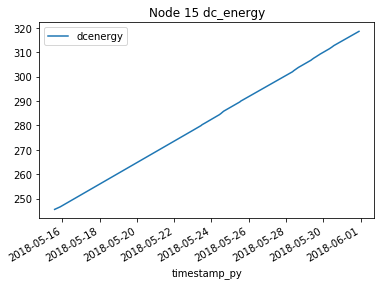

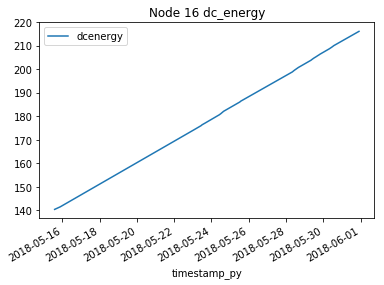

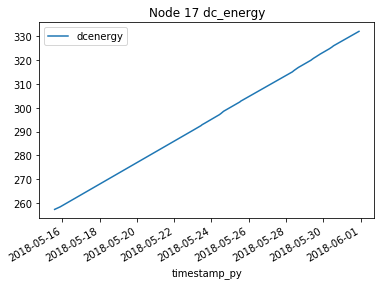

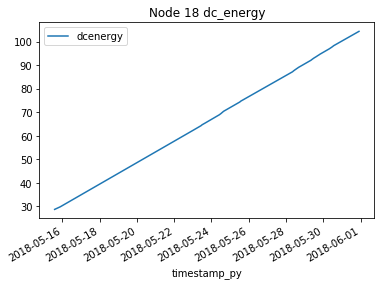

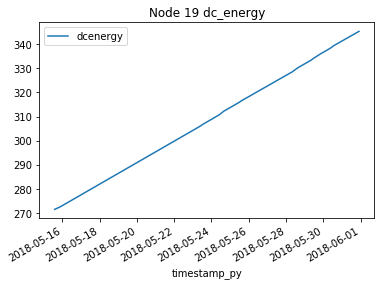

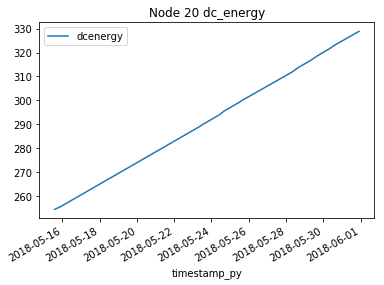

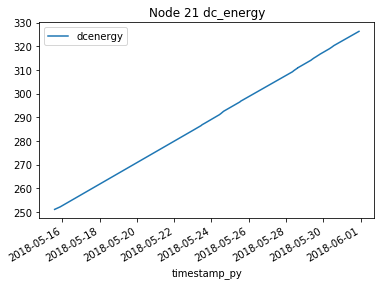

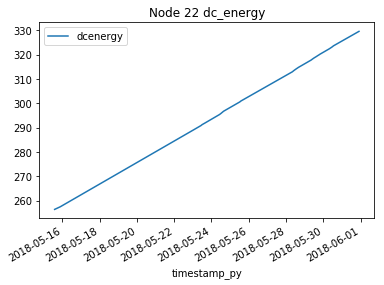

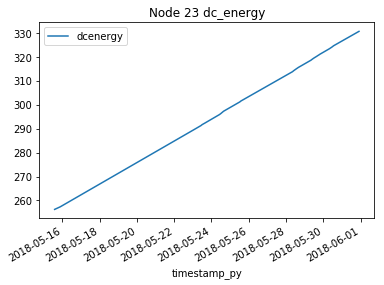

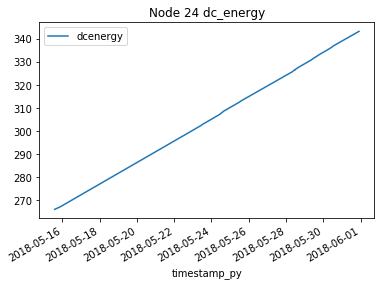

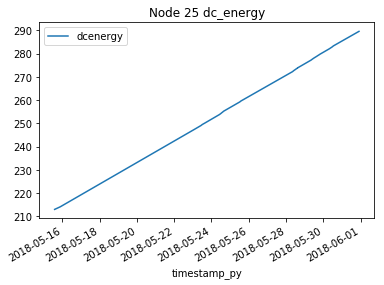

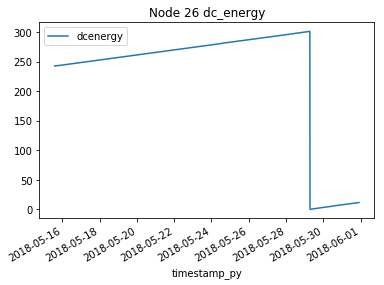

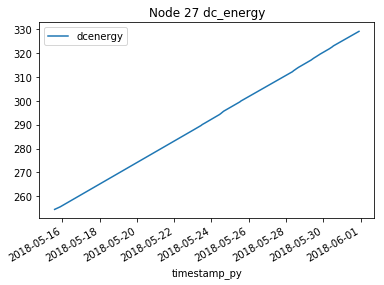

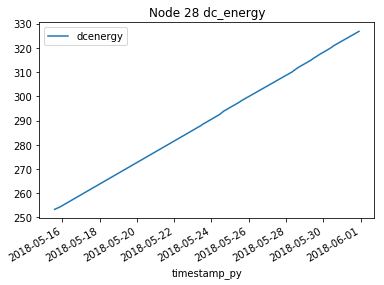

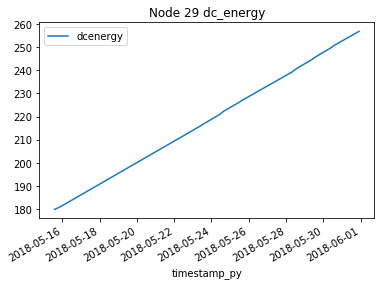

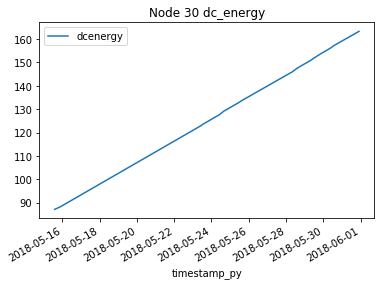

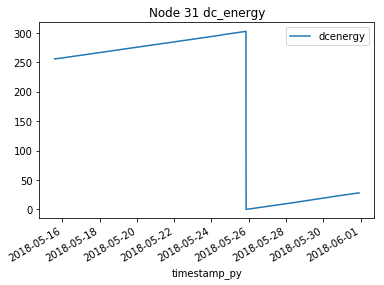

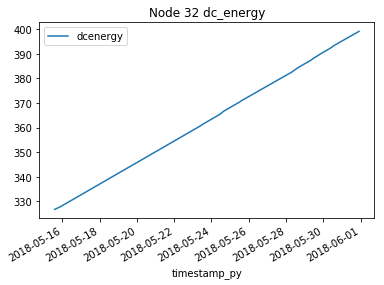

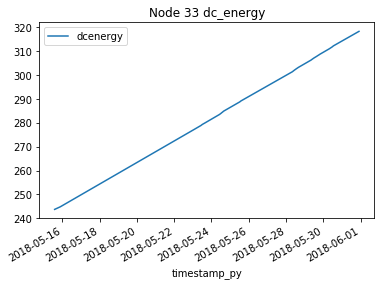

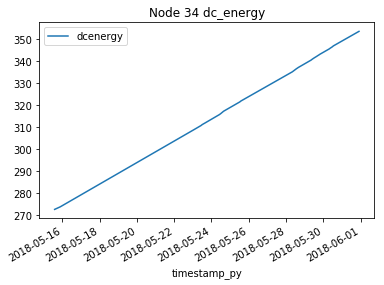

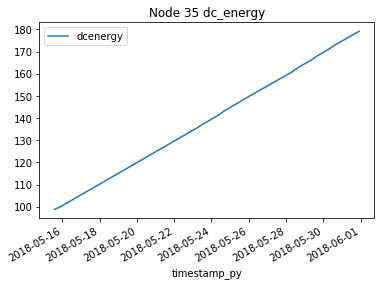

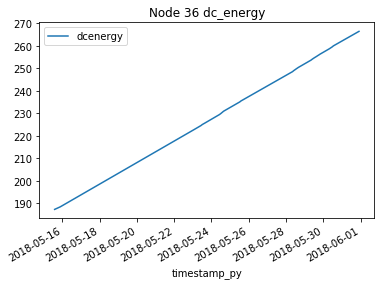

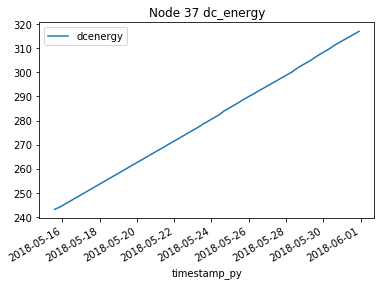

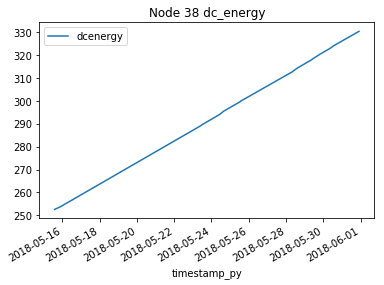

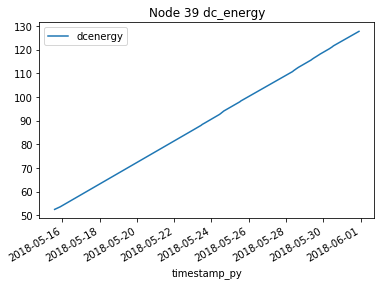

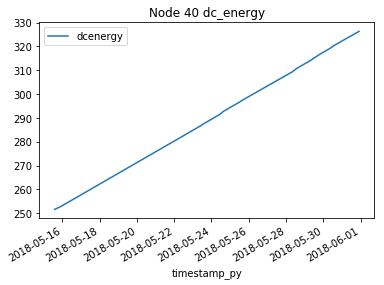

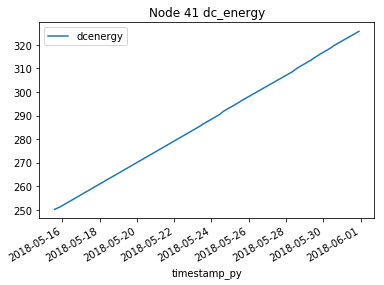

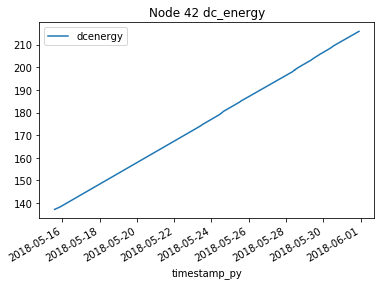

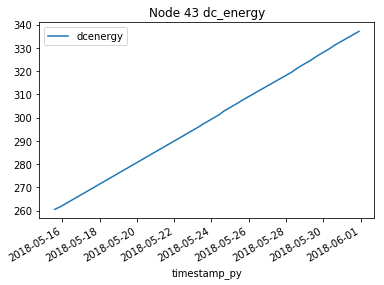

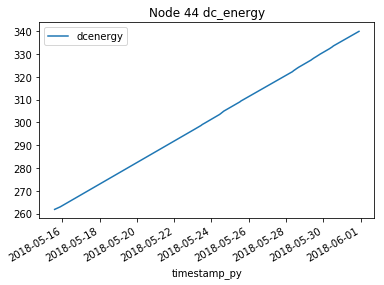

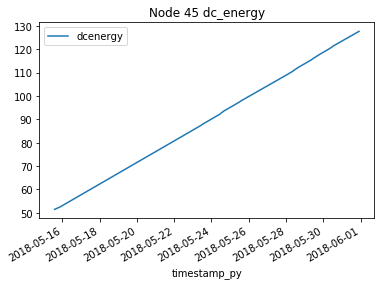

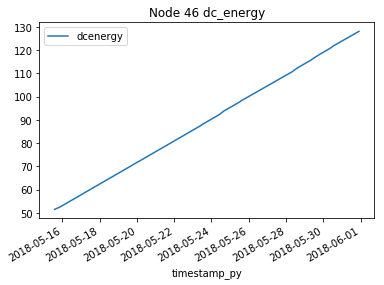

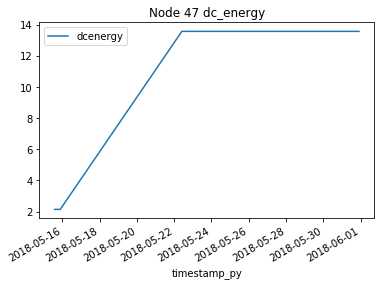

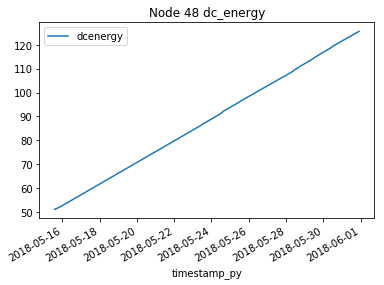

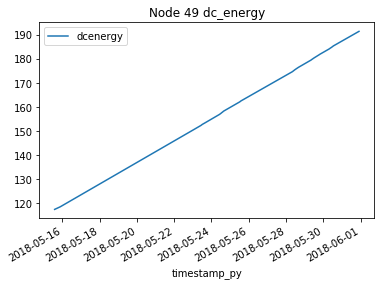

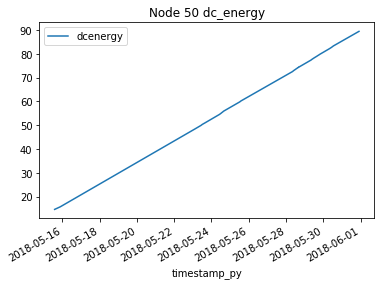

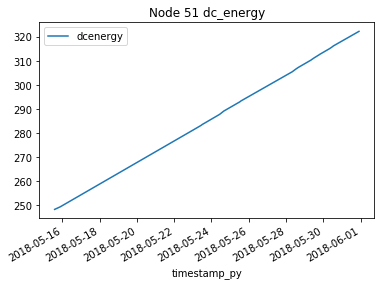

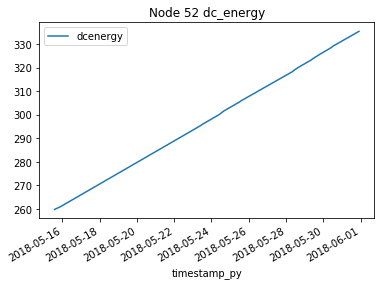

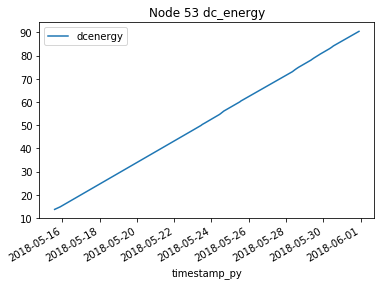

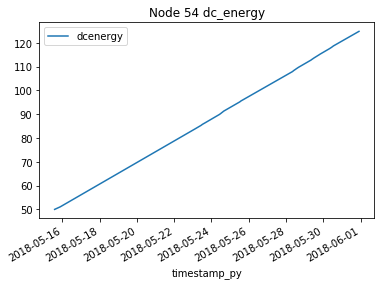

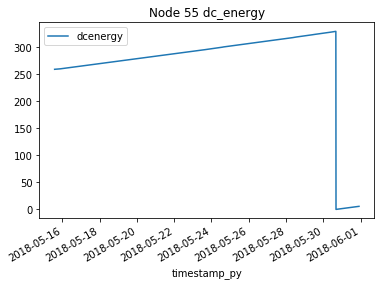

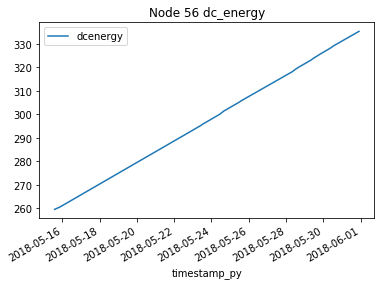

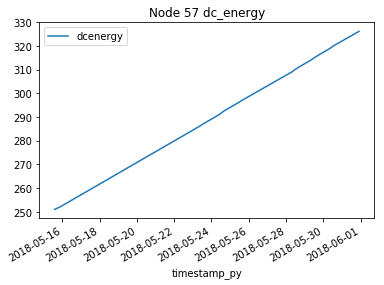

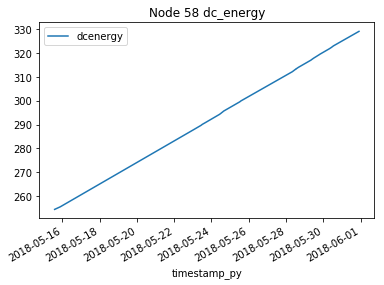

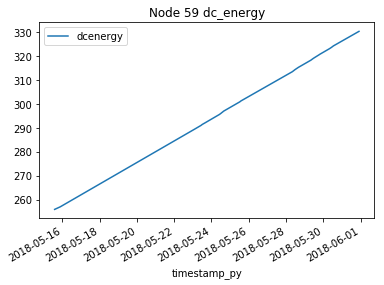

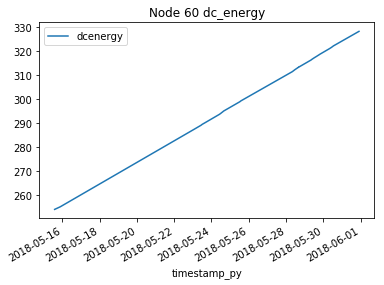

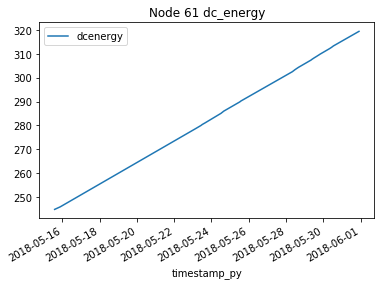

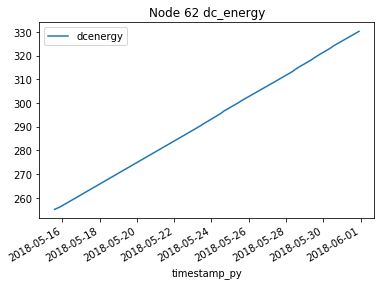

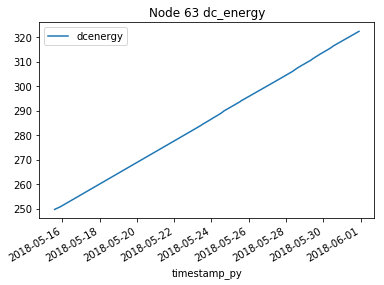

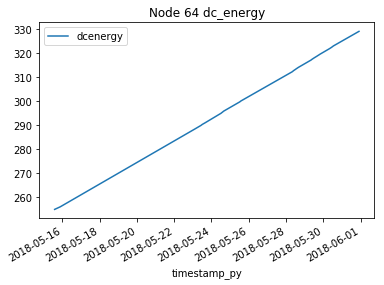

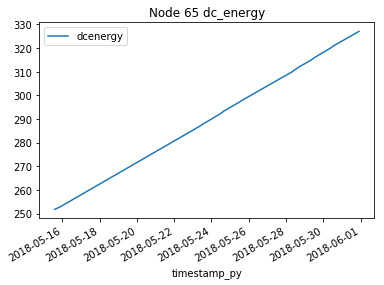

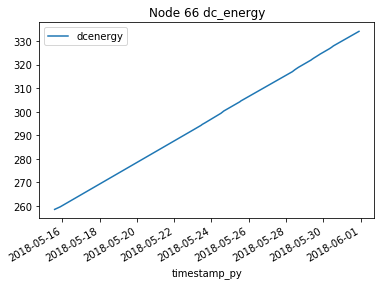

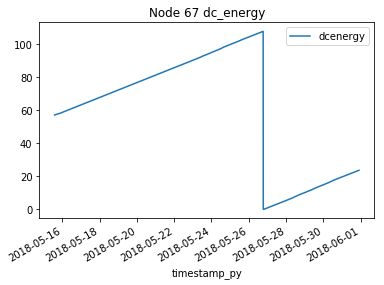

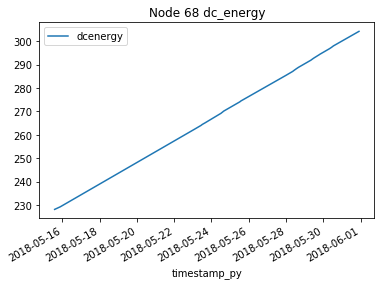

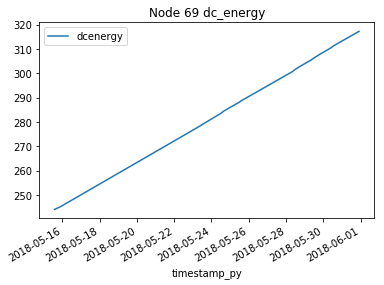

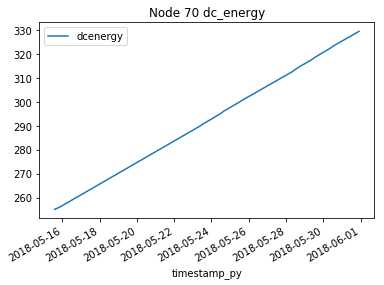

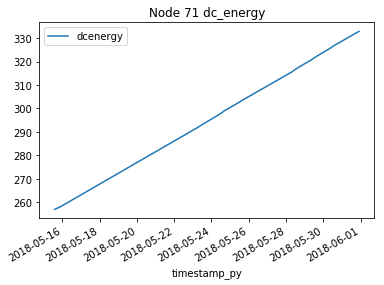

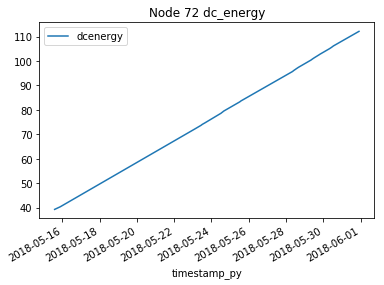

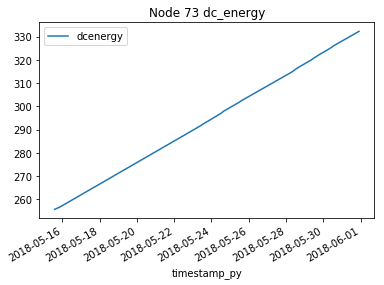

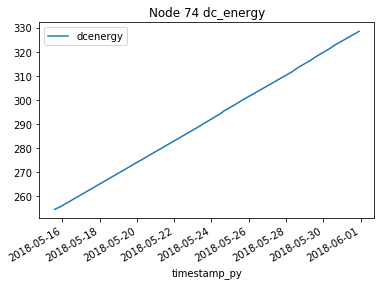

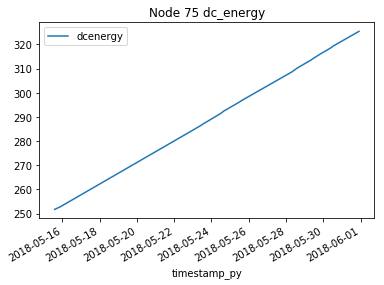

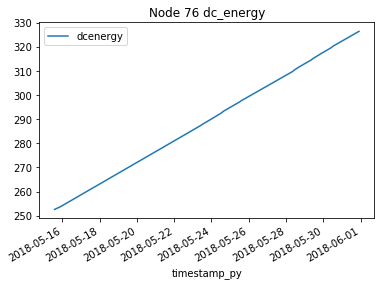

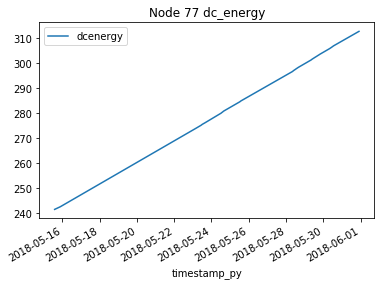

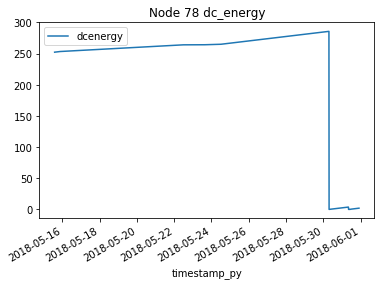

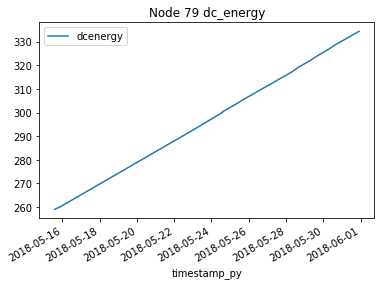

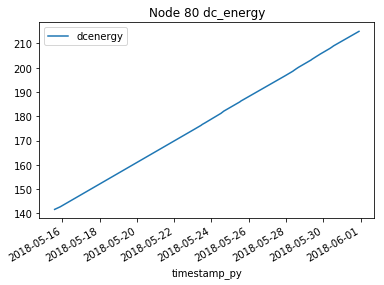

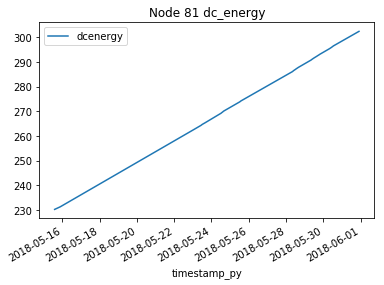

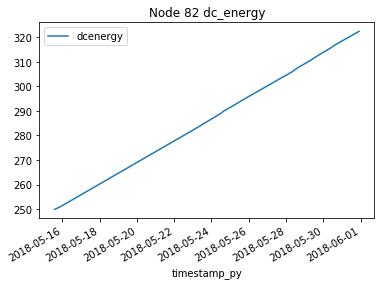

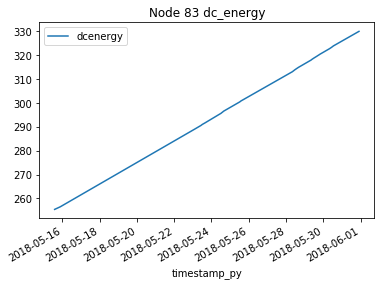

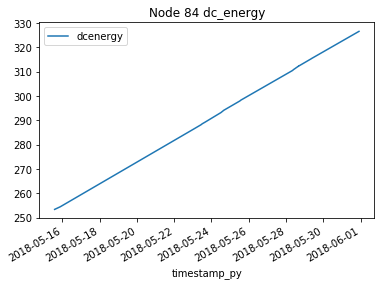

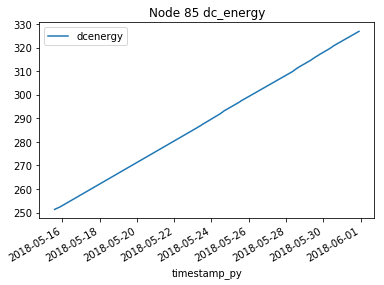

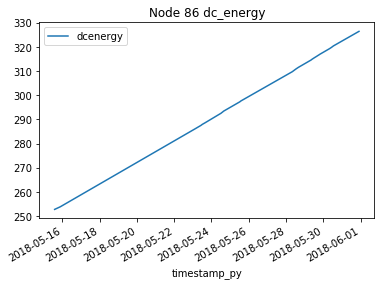

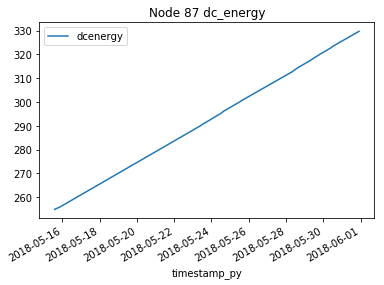

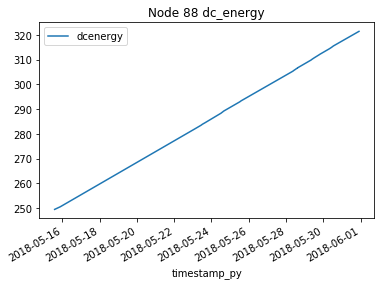

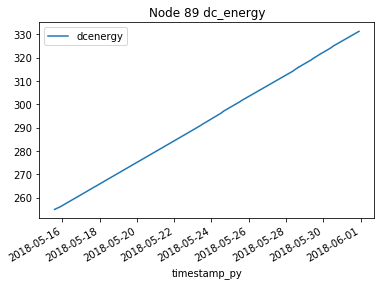

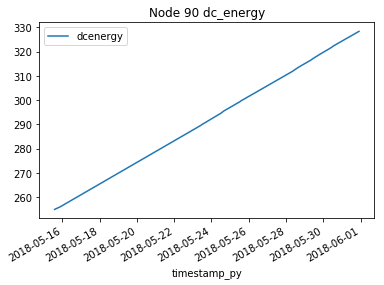

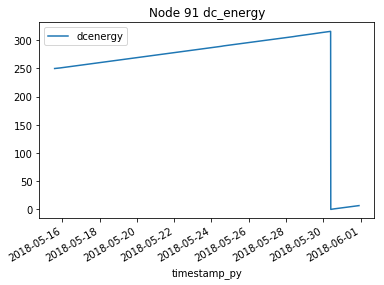

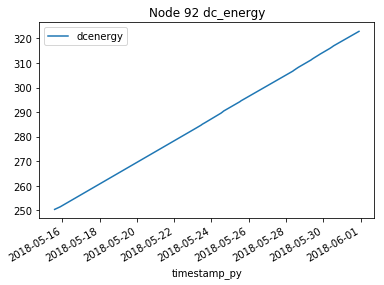

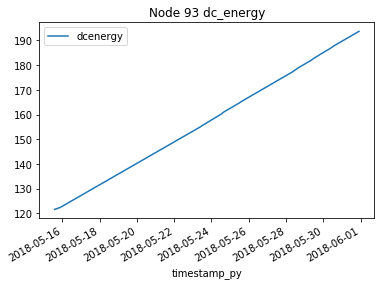

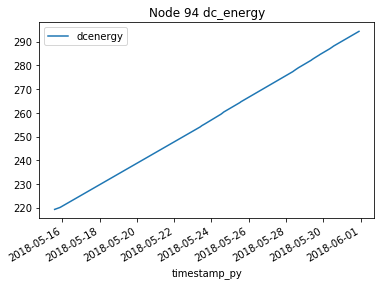

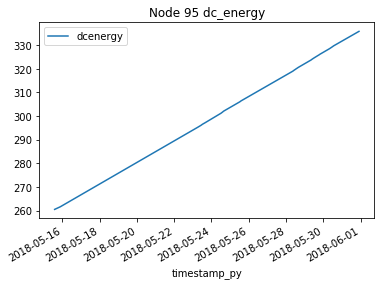

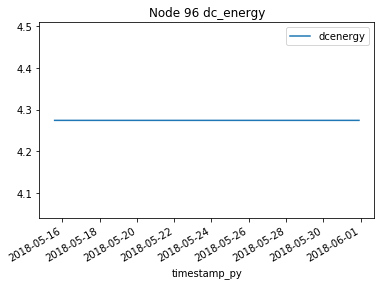

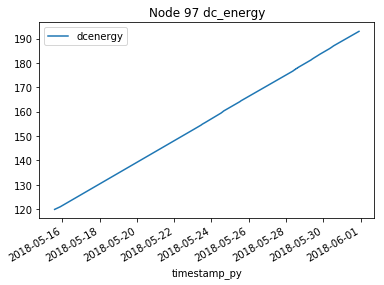

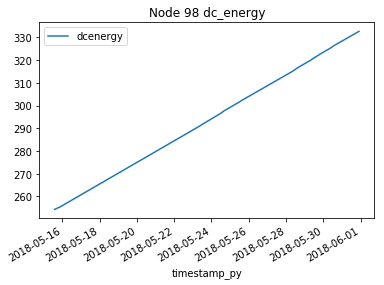

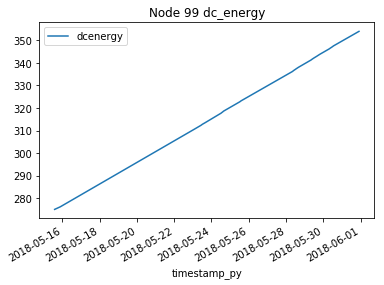

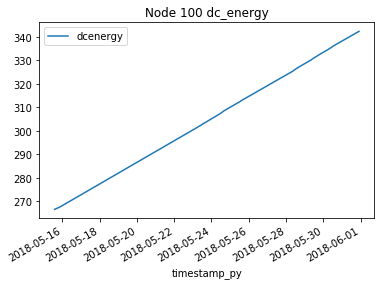

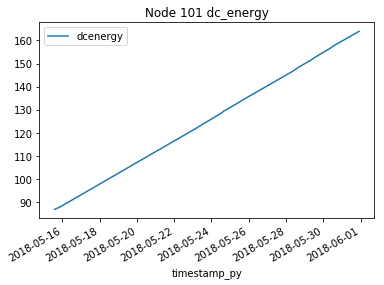

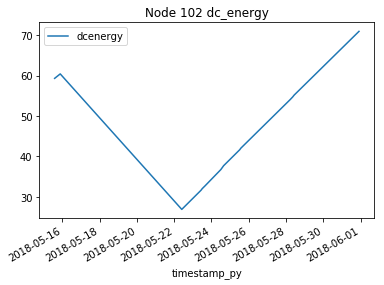

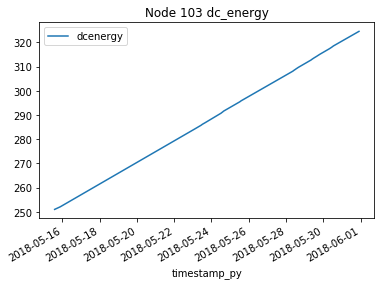

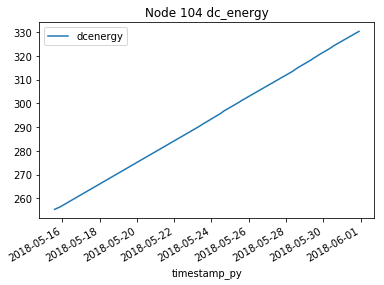

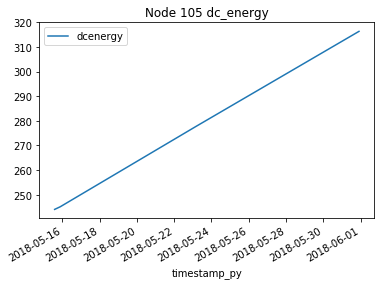

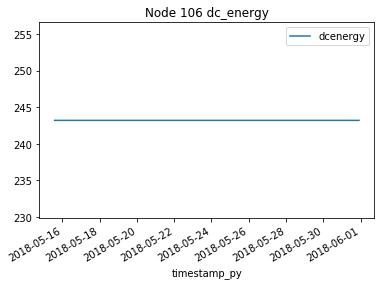

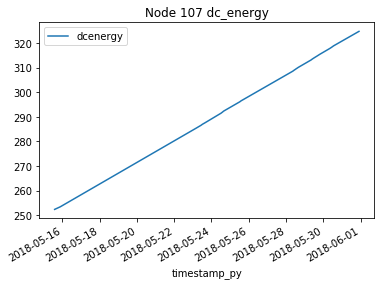

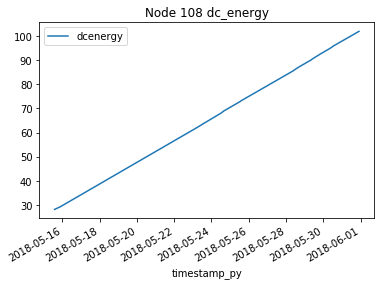

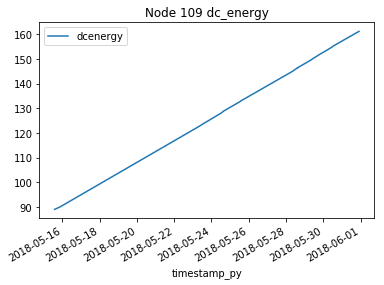

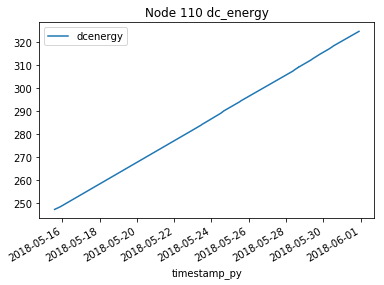

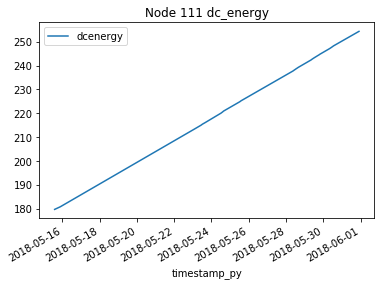

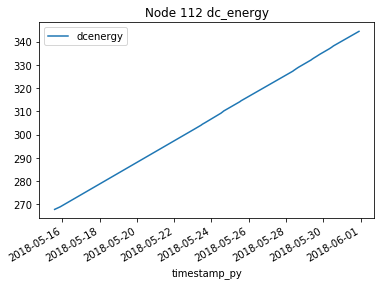

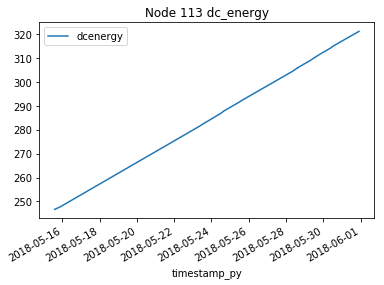

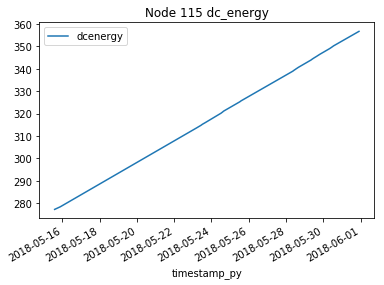

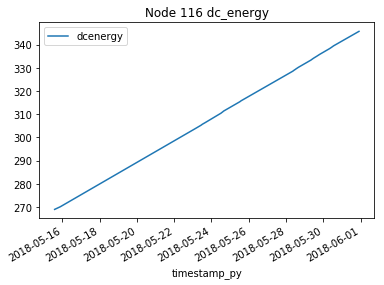

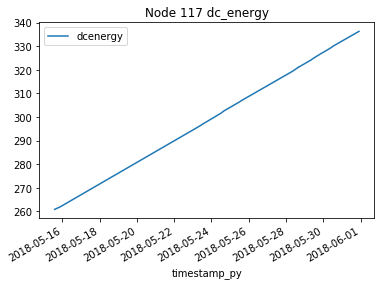

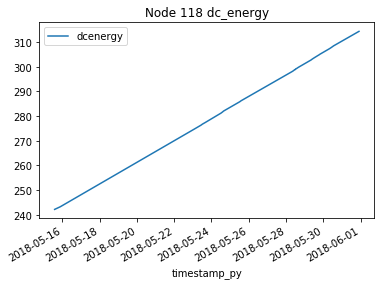

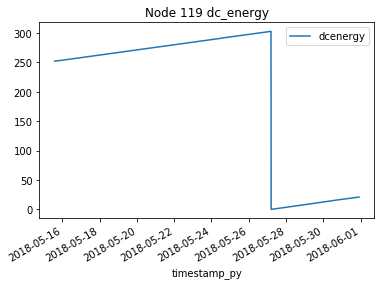

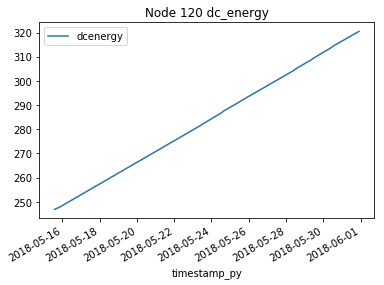

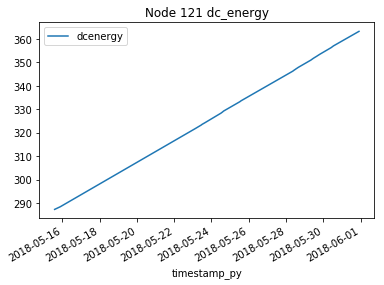

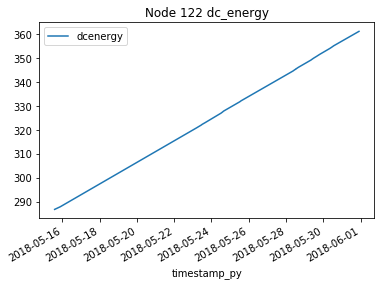

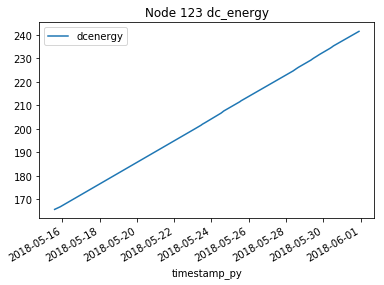

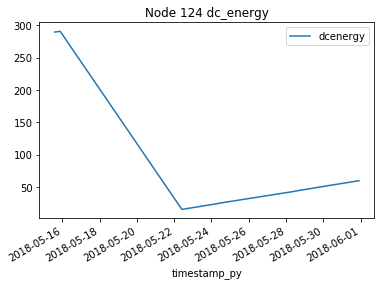

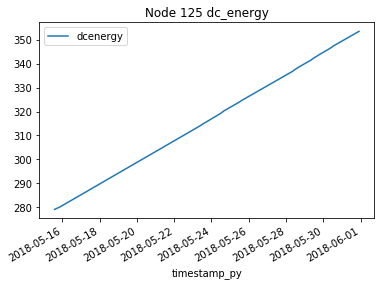

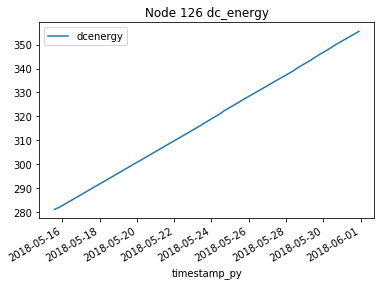

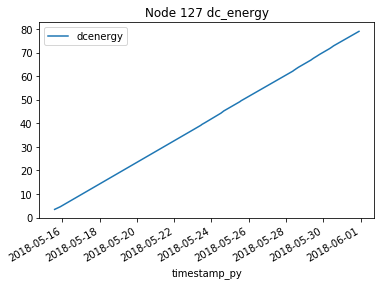

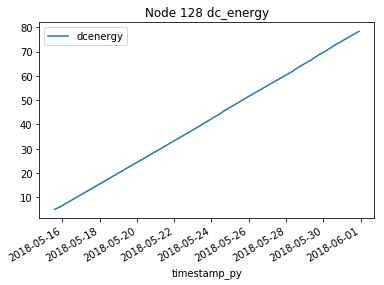

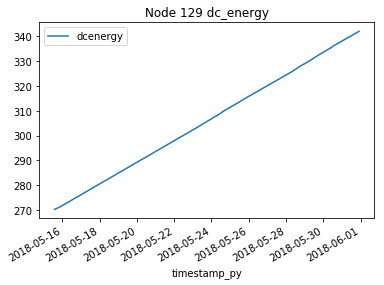

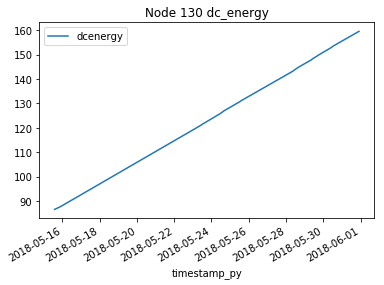

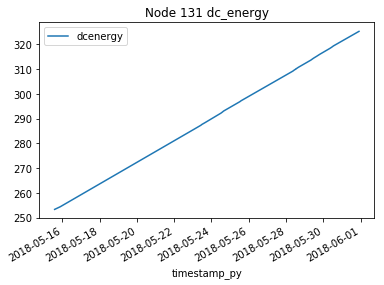

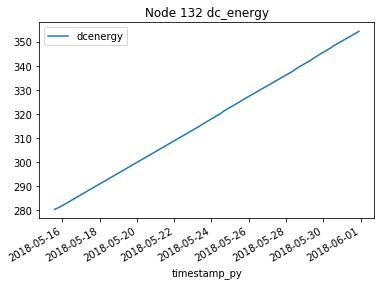

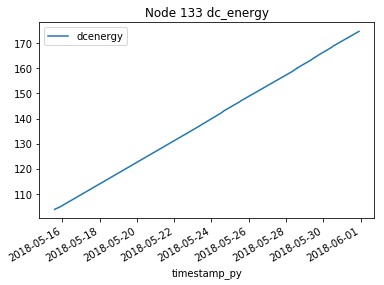

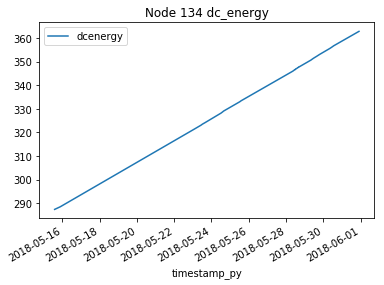

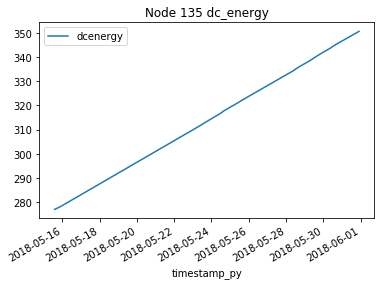

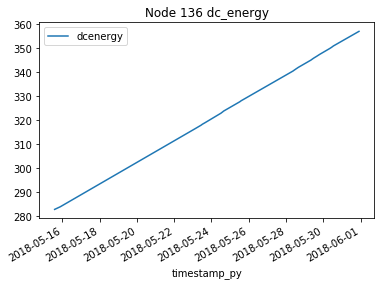

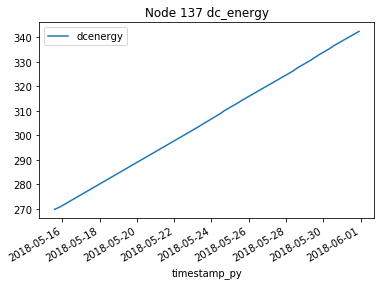

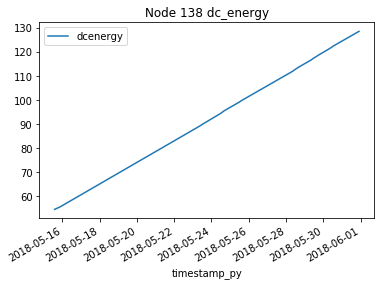

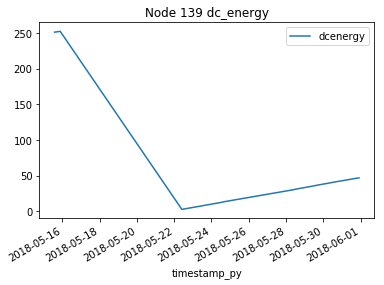

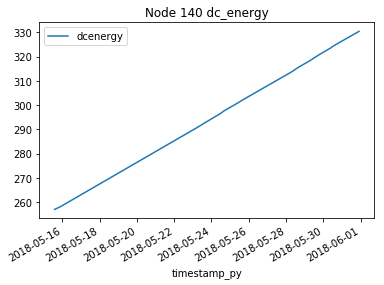

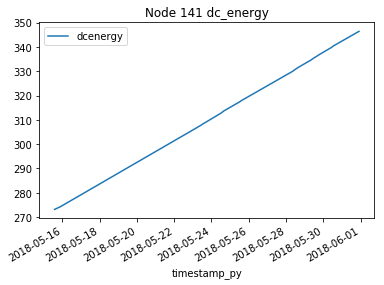

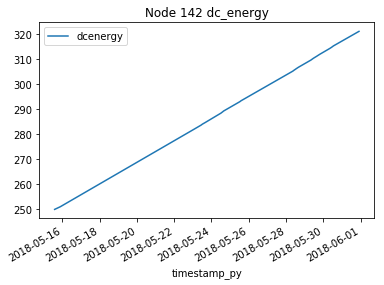

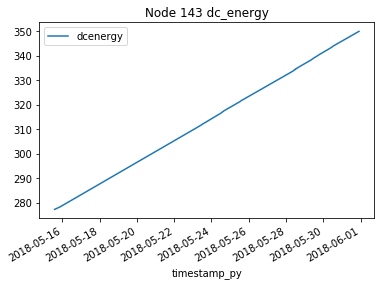

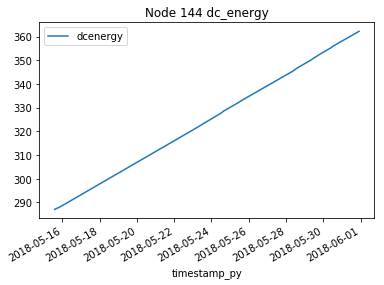

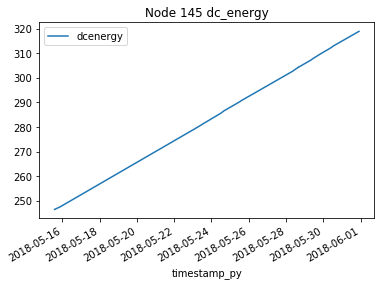

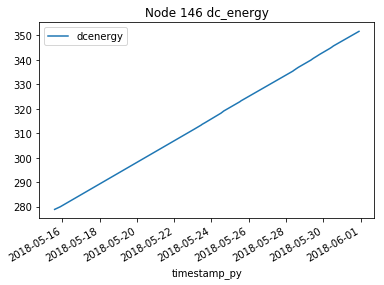

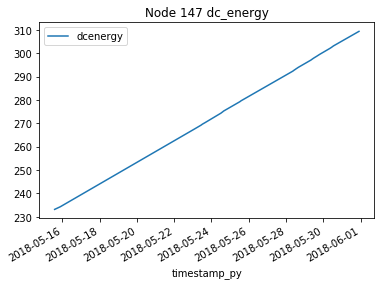

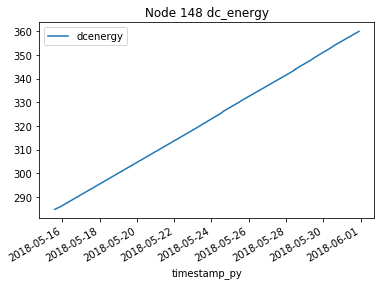

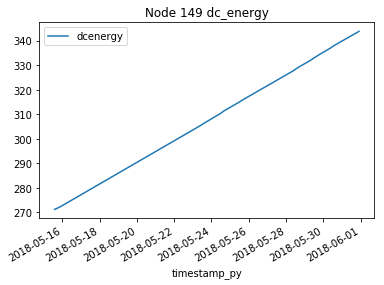

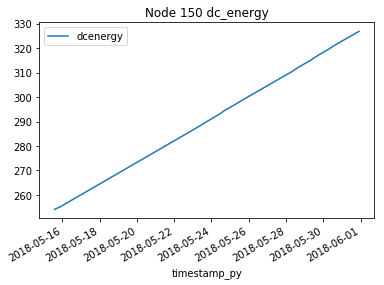

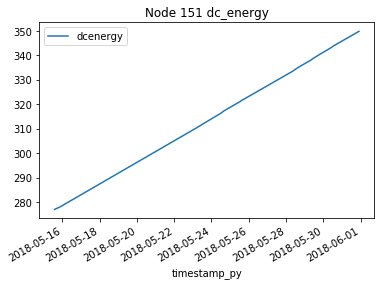

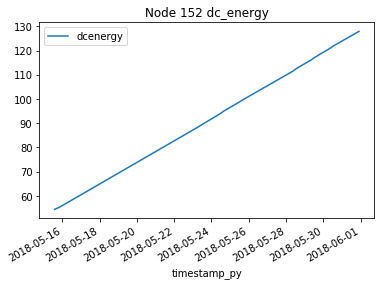

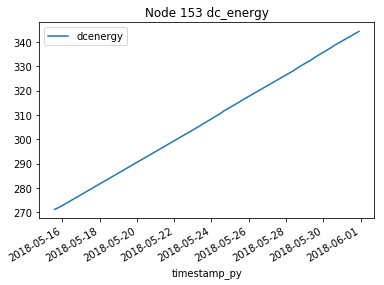

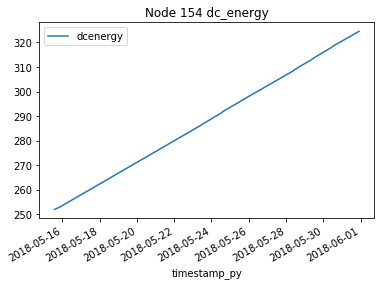

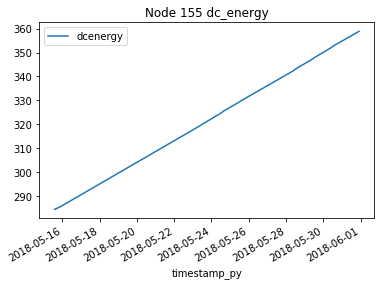

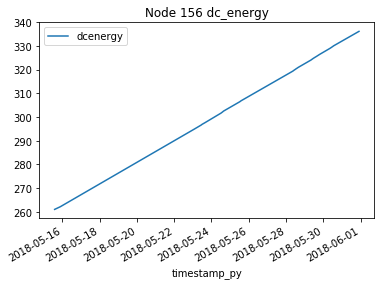

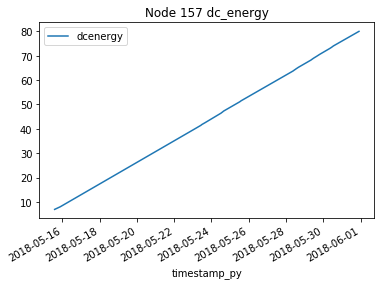

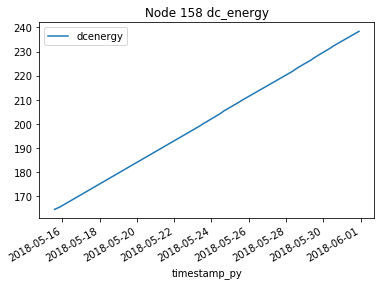

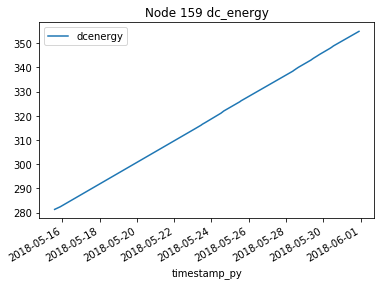

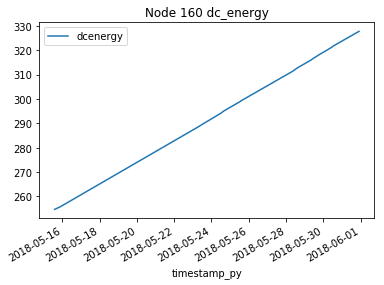

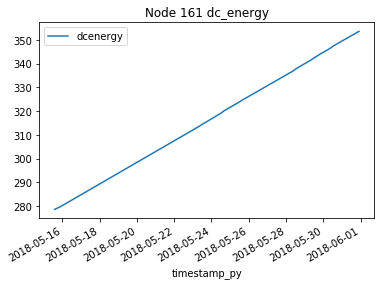

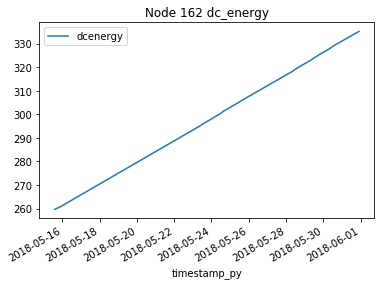

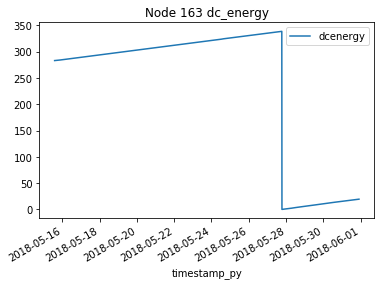

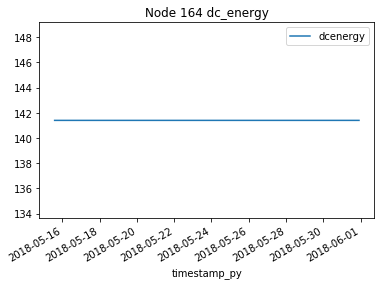

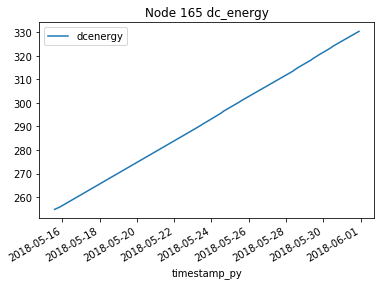

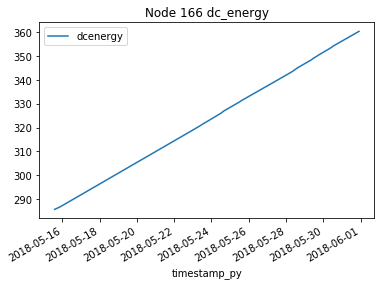

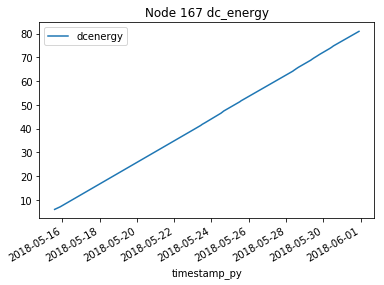

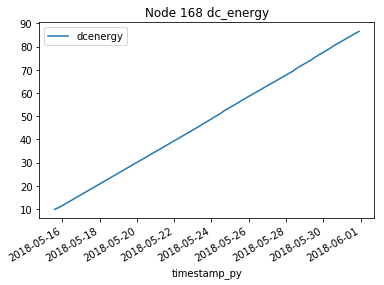

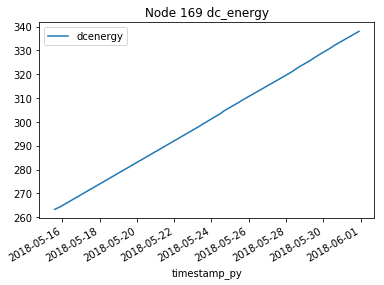

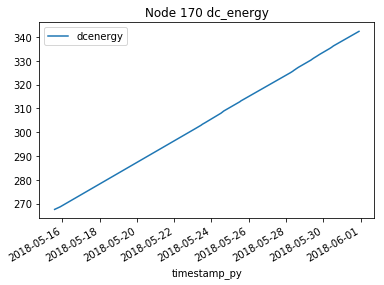

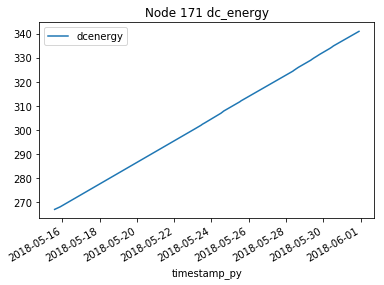

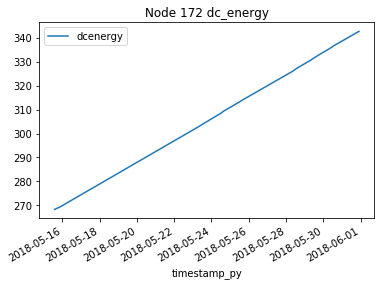

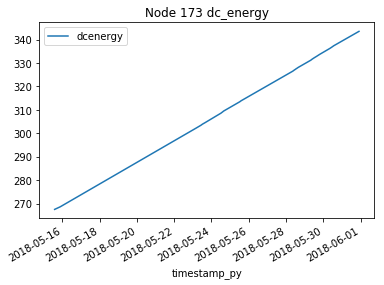

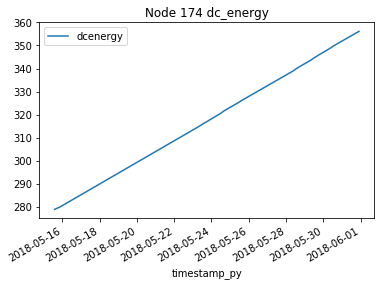

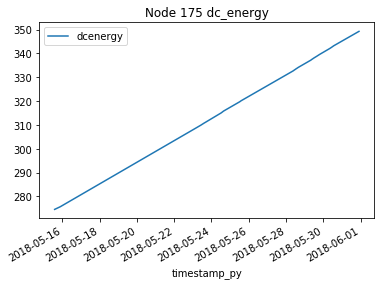

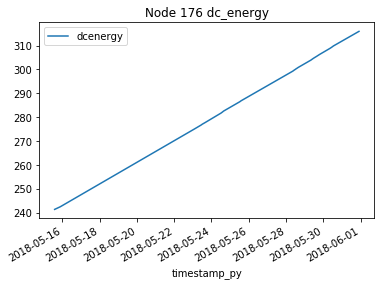

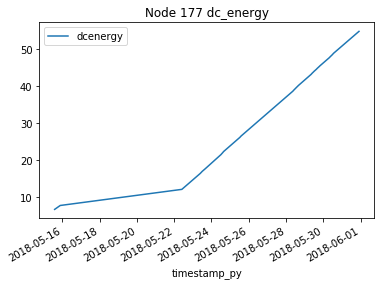

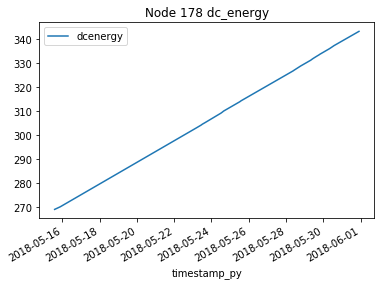

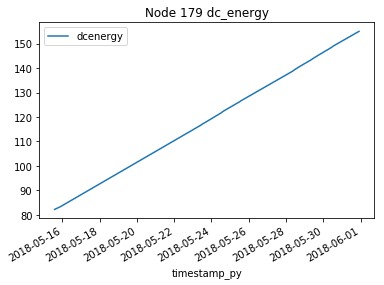

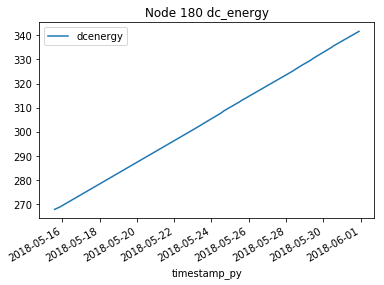

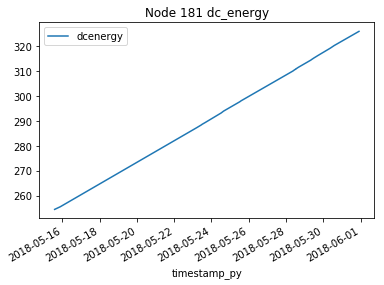

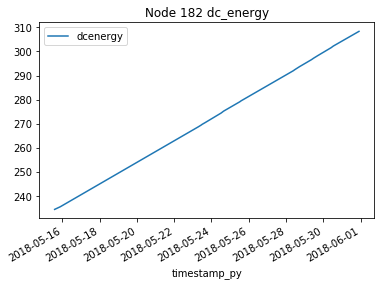

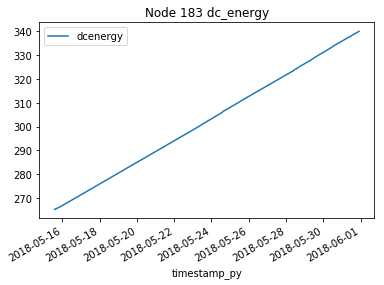

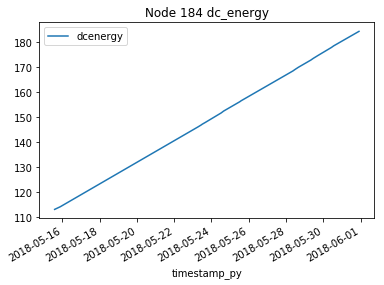

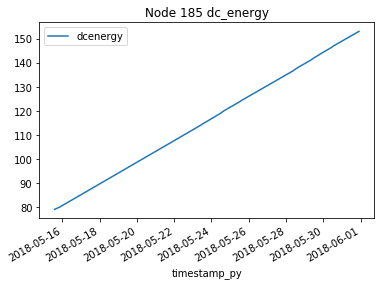

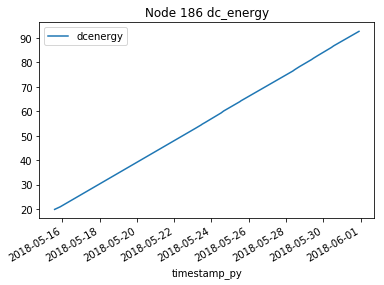

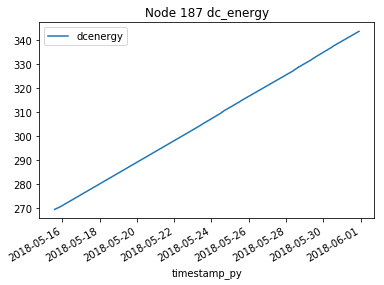

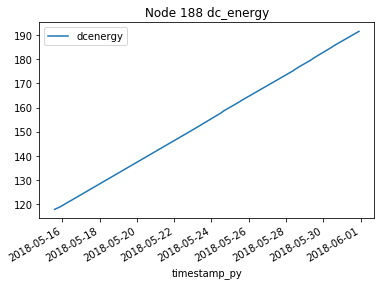

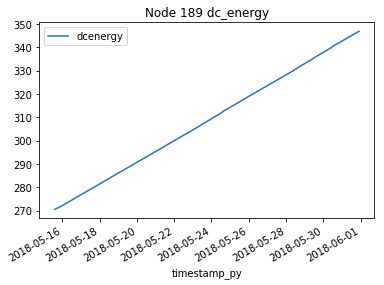

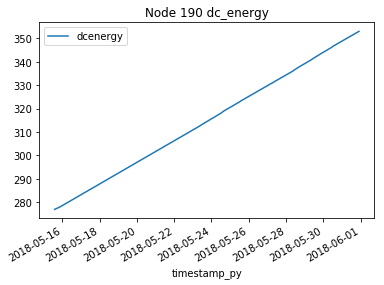

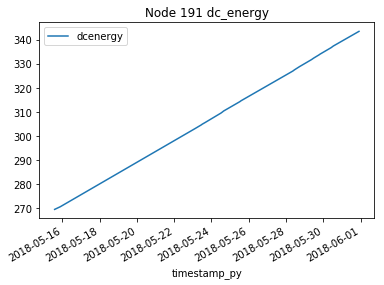

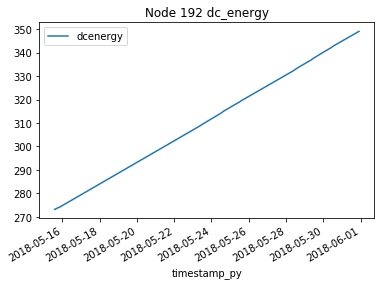

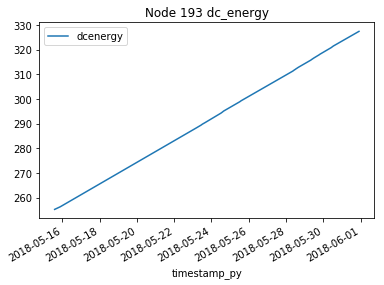

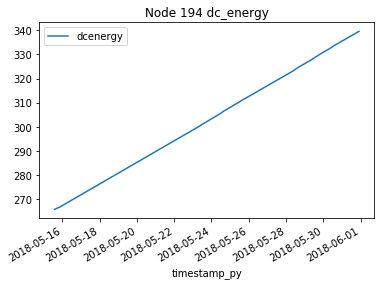

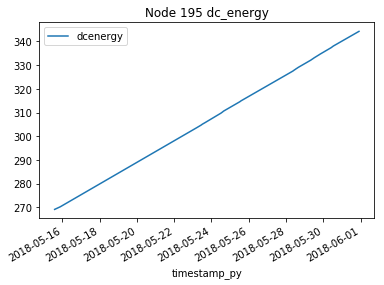

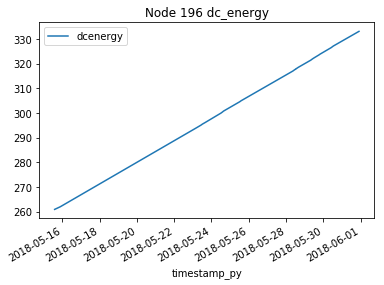

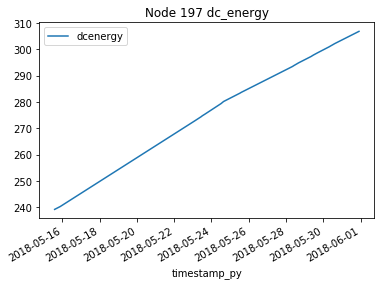

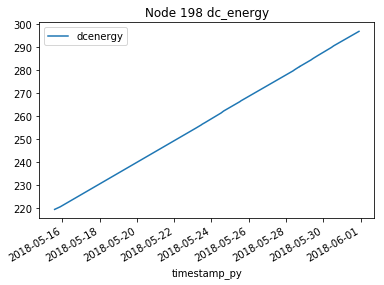

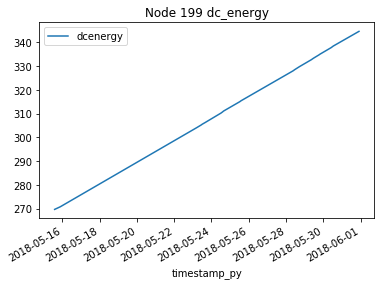

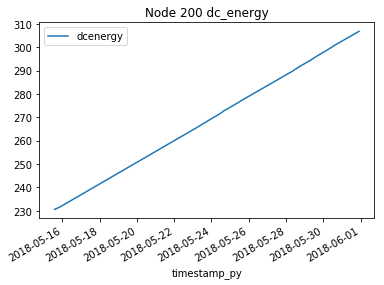

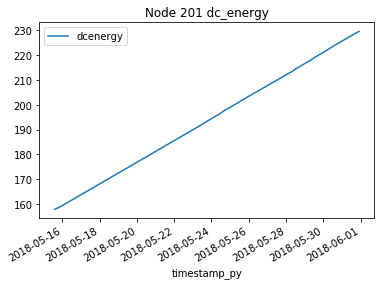

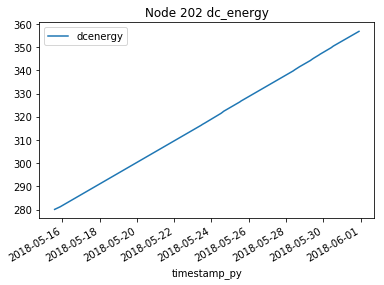

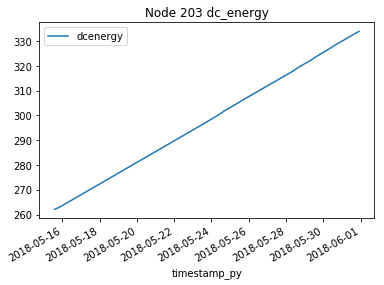

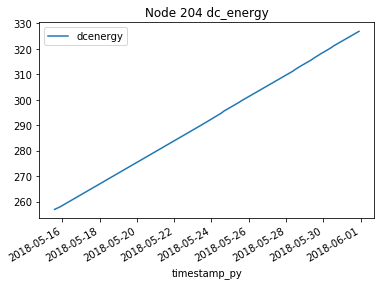

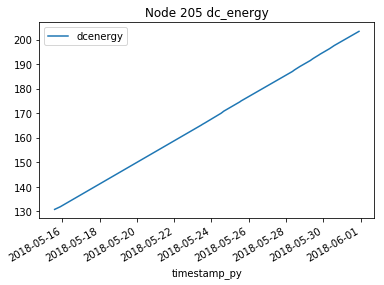

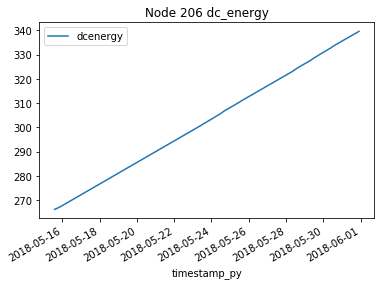

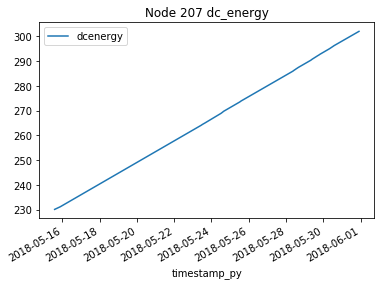

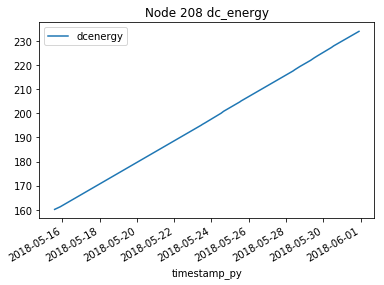

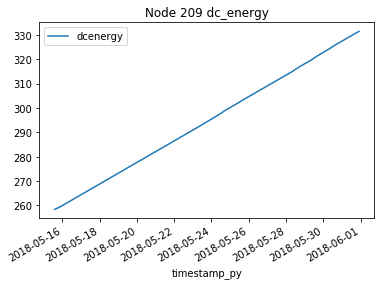

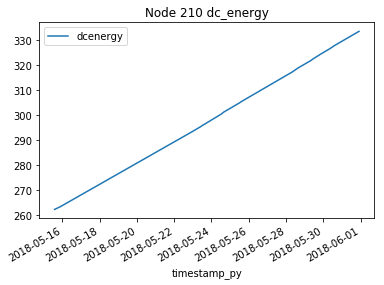

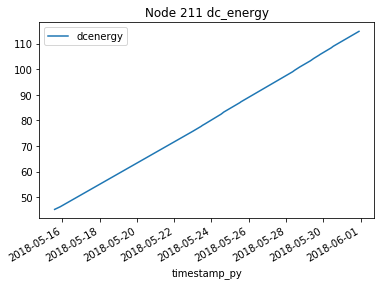

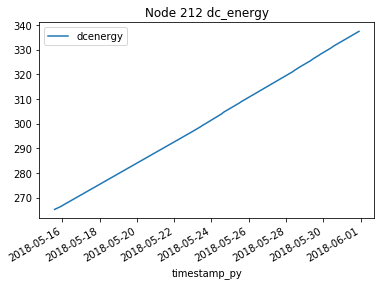

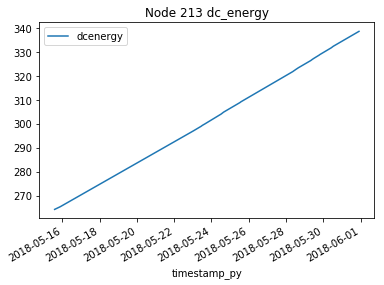

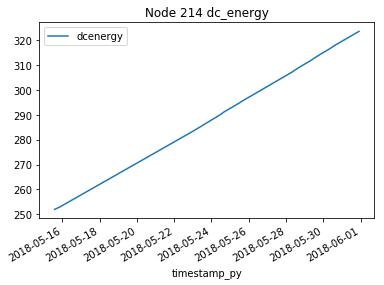

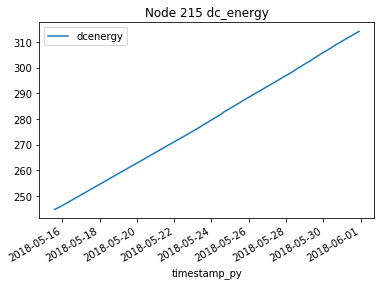

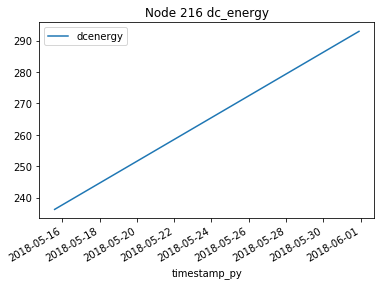

In [14]:
for node in nodes_stats.columns.values:
    int_name = int(node.split('x')[-1])
    node_df[node_df.nodename == node].plot(x='timestamp_py', y='dcenergy', title='Node '+str(int_name)+' dc_energy')